# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

In [1]:
tcgadata="TCGA/focused.1000.T.csv.gz"

In [2]:
gpmpdata="20210604-GPMP-GBM/focused.1000.T.csv.gz"

In [3]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [4]:
threshold=3

In [5]:
import numpy as np
np.__version__

'1.20.3'

In [6]:
import pandas as pd
pd.__version__

'1.2.4'

In [7]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [10]:
import scipy
scipy.__version__

'1.6.3'

In [11]:
from scipy import stats

In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
from datetime import datetime

In [14]:
import sklearn
sklearn.__version__

'0.24.2'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
default_max_columns=pd.get_option('display.max_columns')

In [17]:
default_max_rows=pd.get_option('display.max_rows')

In [18]:
default_precision=pd.get_option('display.precision')

In [19]:
pd.set_option('display.precision', 2)

In [20]:
#default_threshold=np.get_printoptions()['threshold']

In [21]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [22]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [23]:
mt1.shape

(127, 5)

In [24]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [25]:
mt1 #.head()

,subject,days_to_death,gender1,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
...,...,...,...,...,...
122,IK-7675,578.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
123,TM-A7CF,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
124,TQ-A7RK,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
125,TQ-A7RV,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard


In [26]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [27]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [28]:
mt2.shape

(1114, 18)

In [29]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.76,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.73,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.33,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.33,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.16,1.0


In [30]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [31]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [32]:
mt2[['subject','case_submitter_id']].head()

,subject,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [33]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [34]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [35]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [36]:
del mt1
del mt2

In [37]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,subject,days_to_death,gender1,disease_type,center_name
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,68.0,12.32,1.0,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [38]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligodendroglioma:IDH-WT:1p19q-non-codel         4
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

not anymore. I flatten before merging.

In [54]:
#meta.columns=[meta.columns,[''] * len(meta.columns)]

In [55]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

# Read raw TCGA data and cleanup

In [56]:
tcga_df=pd.read_csv(tcgadata,header=[0,1],index_col=[0,1,2,3])
tcga_df #.head()

chromosome                          chr1                                  \
position                         1048000 1190000 1308000 1409000 1410000   
sample      pup    hkle     mapq                                           
02-2483-01A paired HERVK113 Q20        0       0       0       4       1   
                   SVA_A    Q20        0       0       0       0       0   
                   SVA_B    Q20        0       0       0       0       0   
                   SVA_C    Q20        0       0       0       0       0   
                   SVA_D    Q20        0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
TQ-A8XE-10A paired SVA_B    Q20        0       0       0       0       0   
                   SVA_C    Q20        0       0       0       0       0   
                   SVA_D    Q20        0       0       0       0       0   
                   SVA_E    Q20        0       0       0       0       0   
                   SVA_F    Q20        0       0       0       0       0   

chromosome                                                                ...  \
position                         1580000 1581000 2211000 2513000 2581000  ...   
sample      pup    hkle     mapq                                          ...   
02-2483-01A paired HERVK113 Q20        4       0       0       0       0  ...   
                   SVA_A    Q20        0       0       0       0       0  ...   
                   SVA_B    Q20        0       0       0       0       0  ...   
                   SVA_C    Q20        0       0       0       0       0  ...   
                   SVA_D    Q20        0       0       0       0       0  ...   
...                                  ...     ...     ...     ...     ...  ...   
TQ-A8XE-10A paired SVA_B    Q20        0       0       0       0       0  ...   
                   SVA_C    Q20        0       0       0       0       0  ...   
                   SVA_D    Q20        0       0       0       0       0  ...   
                   SVA_E    Q20        0       0       0       0       0  ...   
                   SVA_F    Q20        0       0       0       0       0  ...   

chromosome                           chrY                                      \
position                         19535000 19536000 19699000 19700000 20552000   
sample      pup    hkle     mapq                                                
02-2483-01A paired HERVK113 Q20         0        0        2        0        0   
                   SVA_A    Q20         0        0        0        0        0   
                   SVA_B    Q20         0        0        0        0        0   
                   SVA_C    Q20         0        0        0        0        0   
                   SVA_D    Q20         0        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
TQ-A8XE-10A paired SVA_B    Q20         0        0        0        0        0   
                   SVA_C    Q20         0        0        0        0        0   
                   SVA_D    Q20         0        0        0        0        0   
                   SVA_E    Q20         0        0        0        0        0   
                   SVA_F    Q20         0        0        0        0        0   

chromosome                                                                     
position                         20553000 20976000 21047000 21217000 21639000  
sample      pup    hkle     mapq                                               
02-2483-01A paired HERVK113 Q20         0        0        0        0        0  
                   SVA_A    Q20         0        0        0        0        0  
                   SVA_B    Q20         0        0        0        0        0  
                   SVA_C    Q20         0        0        0        0        0  
                   SVA_D    Q20         0        0        0        0        0  
...                      

In [57]:
tcga_df.reset_index(inplace=True)
tcga_df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1048000 1190000 1308000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1409000 1410000 1580000  ... 19535000 19536000 19699000 19700000   
0                4       1       4  ...        0        0        2        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   20552000 20553000 20976000 21047000 21217000 21639000  
0                 0        0        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 17413 columns]

In [58]:
tcga_df['subject']=tcga_df['sample'].str[0:7]
tcga_df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [59]:
tcga_df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1048000'),
            (   'chr1',  '1190000'),
            (   'chr1',  '1308000'),
            (   'chr1',  '1409000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            ...
            (   'chrY', '19536000'),
            (   'chrY', '19699000'),
            (   'chrY', '19700000'),
            (   'chrY', '20552000'),
            (   'chrY', '20553000'),
            (   'chrY', '20976000'),
            (   'chrY', '21047000'),
            (   'chrY', '21217000'),
            (   'chrY', '21639000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=17414)

In [60]:
tcga_df=tcga_df[tcga_df['hkle']==hkle]
tcga_df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1048000 1190000 1308000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
7           02-2483-10A  paired  HERVK113  Q20       0       0       0   
14          02-2485-01A  paired  HERVK113  Q20       0       0       0   
21          02-2485-10A  paired  HERVK113  Q20       0       0       0   
28          06-0125-01A  paired  HERVK113  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1409000 1410000 1580000  ... 19536000 19699000 19700000 20552000   
0                4       1       4  ...        0        2        0        0   
7                2       3       3  ...        0        1        1        0   
14               3       4       4  ...        0        0        1        0   
21               8       0       0  ...        0        1        0        0   
28               9       6       9  ...        0        0        0        0   

chromosome                                               subject  
position   20553000 20976000 21047000 21217000 21639000           
0                 0        0        0        0        0  02-2483  
7                 0        0        0        0        0  02-2483  
14                0        1        0        0        0  02-2485  
21                0        0        0        0        0  02-2485  
28                0        0        0        0        0  06-0125  

[5 rows x 17414 columns]

In [61]:
tcga_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
tcga_df.head()

chromosome                                  chr1                          \
position                                 1048000 1190000 1308000 1409000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        0       0       0       4   
        02-2483-10A paired HERVK113 Q20        0       0       0       2   
02-2485 02-2485-01A paired HERVK113 Q20        0       0       0       3   
        02-2485-10A paired HERVK113 Q20        0       0       0       8   
06-0125 06-0125-01A paired HERVK113 Q20        0       0       0       9   

chromosome                                                                \
position                                 1410000 1580000 1581000 2211000   
subject sample      pup    hkle     mapq                                   
02-2483 02-2483-01A paired HERVK113 Q20        1       4       0       0   
        02-2483-10A paired HERVK113 Q20        3       3       0       0   
02-2485 02-2485-01A paired HERVK113 Q20        4       4       0       0   
        02-2485-10A paired HERVK113 Q20        0       0       0       0   
06-0125 06-0125-01A paired HERVK113 Q20        6       9       0       0   

chromosome                                                ...     chrY  \
position                                 2513000 2581000  ... 19535000   
subject sample      pup    hkle     mapq                  ...            
02-2483 02-2483-01A paired HERVK113 Q20        0       0  ...        0   
        02-2483-10A paired HERVK113 Q20        0       0  ...        0   
02-2485 02-2485-01A paired HERVK113 Q20        0       0  ...        0   
        02-2485-10A paired HERVK113 Q20        0       0  ...        0   
06-0125 06-0125-01A paired HERVK113 Q20        0       0  ...        0   

chromosome                                                                    \
position                                 19536000 19699000 19700000 20552000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        2        0        0   
        02-2483-10A paired HERVK113 Q20         0        1        1        0   
02-2485 02-2485-01A paired HERVK113 Q20         0        0        1        0   
        02-2485-10A paired HERVK113 Q20         0        1        0        0   
06-0125 06-0125-01A paired HERVK113 Q20         0        0        0        0   

chromosome                                                                    \
position                                 20553000 20976000 21047000 21217000   
subject sample      pup    hkle     mapq                                       
02-2483 02-2483-01A paired HERVK113 Q20         0        0        0        0   
        02-2483-10A paired HERVK113 Q20         0        0        0        0   
02-2485 02-2485-01A paired HERVK113 Q20         0        1        0        0   
        02-2485-10A paired HERVK113 Q20         0        0        0        0   
06-0125 06-0125-01A paired HERVK113 Q20         0        0        0        0   

chromosome                                         
position                                 21639000  
subject sample      pup    hkle     mapq           
02-2483 02-2483-01A paired HERVK113 Q20         0  
        02-2483-10A paired HERVK113 Q20         0  
02-2485 02-2485-01A paired HERVK113 Q20         0  
        02-2485-10A paired HERVK113 Q20         0  
06-0125 06-0125-01A paired HERVK113 Q20         0  

[5 rows x 17409 columns]

In [62]:
tcga_df.shape

(274, 17409)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [63]:
tcga_df=tcga_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
tcga_df #.head()

chromosome             chr1                                                  \
position            1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject sample                                                                
02-2483 02-2483-01A       0       0       0       4       1       4       0   
        02-2483-10A       0       0       0       2       3       3       0   
02-2485 02-2485-01A       0       0       0       3       4       4       0   
        02-2485-10A       0       0       0       8       0       0       0   
06-0125 06-0125-01A       0       0       0       9       6       9       0   
...                     ...     ...     ...     ...     ...     ...     ...   
TQ-A7RV TQ-A7RV-02A       0       0       0       8       5      11       0   
        TQ-A7RV-10A       0       0       0       4       2       7       0   
TQ-A8XE TQ-A8XE-01A       0       0       0       5       5       2       0   
        TQ-A8XE-02A       0       0       0      12       2       3       0   
        TQ-A8XE-10A       0       0       0       6       4       6       0   

chromosome                                   ...     chrY                    \
position            2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject sample                               ...                              
02-2483 02-2483-01A       0       0       0  ...        0        0        2   
        02-2483-10A       0       0       0  ...        0        0        1   
02-2485 02-2485-01A       0       0       0  ...        0        0        0   
        02-2485-10A       0       0       0  ...        0        0        1   
06-0125 06-0125-01A       0       0       0  ...        0        0        0   
...                     ...     ...     ...  ...      ...      ...      ...   
TQ-A7RV TQ-A7RV-02A       0       0       0  ...        0        0        0   
        TQ-A7RV-10A       0       0       0  ...        0        0        0   
TQ-A8XE TQ-A8XE-01A       0       0       0  ...        0        0        0   
        TQ-A8XE-02A       0       0       0  ...        0        0        0   
        TQ-A8XE-10A       0       0       0  ...        0        0        0   

chromosome                                                                 \
position            19700000 20552000 20553000 20976000 21047000 21217000   
subject sample                                                              
02-2483 02-2483-01A        0        0        0        0        0        0   
        02-2483-10A        1        0        0        0        0        0   
02-2485 02-2485-01A        1        0        0        1        0        0   
        02-2485-10A        0        0        0        0        0        0   
06-0125 06-0125-01A        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
TQ-A7RV TQ-A7RV-02A        2        0        0        0        0        0   
        TQ-A7RV-10A        1        1        0        0        0        0   
TQ-A8XE TQ-A8XE-01A        0        0        0        0        0        0   
        TQ-A8XE-02A        0        0        0        0        0        0   
        TQ-A8XE-10A        0        0        0        0        0        0   

chromosome                    
position            21639000  
subject sample                
02-2483 02-2483-01A        0  
        02-2483-10A        0  
02-2485 02-2485-01A        0  
        02-2485-10A        0  
06-0125 06-0125-01A        0  
...                      ...  
TQ-A7RV TQ-A7RV-02A        0  
        TQ-A7RV-10A        0  
TQ-A8XE TQ-A8XE-01A        0  
        TQ-A8XE-02A        0  
        TQ-A8XE-10A        0  

[274 rows x 17409 columns]

In [65]:
tcga_df.shape

(274, 17409)

## Drop recurrent tumor (-02?)

In [66]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([('06-0125', '06-0125-02A'),
            ('06-0152', '06-0152-02A'),
            ('06-0171', '06-0171-02A'),
            ('06-0190', '06-0190-02A'),
            ('06-0210', '06-0210-02A'),
            ('06-0211', '06-0211-02A'),
            ('06-0221', '06-0221-02A'),
            ('14-1034', '14-1034-02B'),
            ('14-1402', '14-1402-02A'),
            ('19-1389', '19-1389-02A'),
            ('DH-A669', 'DH-A669-02A'),
            ('DU-5870', 'DU-5870-02A'),
            ('DU-5872', 'DU-5872-02A'),
            ('DU-6397', 'DU-6397-02A'),
            ('DU-6404', 'DU-6404-02A'),
            ('DU-6404', 'DU-6404-02B'),
            ('DU-6407', 'DU-6407-02A'),
            ('DU-6407', 'DU-6407-02B'),
            ('DU-7304', 'DU-7304-02A'),
            ('FG-5965', 'FG-5965-02A'),
            ('FG-5965', 'FG-5965-02B'),
            ('FG-A4MT', 'FG-A4MT-02A'),
            ('TM-A7CF', 'TM-A7CF-02A'),
            ('TQ-A7RK', 'TQ-A7RK-02A'),
            ('TQ-A7RK', 'TQ-A7RK-02B'),


In [67]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index,axis='index',inplace=True)

In [68]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([], names=['subject', 'sample'])

## Drop solid normal (-11?) (I've seen a couple)

In [69]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([('FG-5963', 'FG-5963-11A')],
           names=['subject', 'sample'])

In [70]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index,axis='index',inplace=True)

In [71]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([], names=['subject', 'sample'])

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [72]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A')],
           names=['subject', 'sample'])

In [73]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [74]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample'])

In [75]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A')],
           names=['subject', 'sample'])

In [76]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [77]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [78]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['CS-6186','CS-6186-01A']

1100

In [79]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['CS-6186','CS-6186-10A']

950

In [80]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['DU-5872','DU-5872-01A']

1108

In [81]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['DU-5872','DU-5872-10A']

776

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

In [82]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [83]:
tcga_df.index.get_level_values('subject')


Index(['02-2483', '02-2483', '02-2485', '02-2485', '06-0125', '06-0125',
       '06-0157', '06-0157', '06-0171', '06-0171',
       ...
       'IK-7675', 'IK-7675', 'TM-A7CF', 'TM-A7CF', 'TQ-A7RK', 'TQ-A7RK',
       'TQ-A7RV', 'TQ-A7RV', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=244)

In [84]:
tcga_df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,

In [85]:
tcga_df=tcga_df[tcga_df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]
tcga_df #.head()


chromosome             chr1                                                  \
position            1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject sample                                                                
02-2483 02-2483-01A       0       0       0       4       1       4       0   
        02-2483-10A       0       0       0       2       3       3       0   
02-2485 02-2485-01A       0       0       0       3       4       4       0   
        02-2485-10A       0       0       0       8       0       0       0   
06-0125 06-0125-01A       0       0       0       9       6       9       0   
...                     ...     ...     ...     ...     ...     ...     ...   
TQ-A7RK TQ-A7RK-10A       0       0       0       5       0       5       0   
TQ-A7RV TQ-A7RV-01A       0       0       0       6       3       6       0   
        TQ-A7RV-10A       0       0       0       4       2       7       0   
TQ-A8XE TQ-A8XE-01A       0       0       0       5       5       2       0   
        TQ-A8XE-10A       0       0       0       6       4       6       0   

chromosome                                   ...     chrY                    \
position            2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject sample                               ...                              
02-2483 02-2483-01A       0       0       0  ...        0        0        2   
        02-2483-10A       0       0       0  ...        0        0        1   
02-2485 02-2485-01A       0       0       0  ...        0        0        0   
        02-2485-10A       0       0       0  ...        0        0        1   
06-0125 06-0125-01A       0       0       0  ...        0        0        0   
...                     ...     ...     ...  ...      ...      ...      ...   
TQ-A7RK TQ-A7RK-10A       0       0       0  ...        0        0        0   
TQ-A7RV TQ-A7RV-01A       0       0       0  ...        0        0        1   
        TQ-A7RV-10A       0       0       0  ...        0        0        0   
TQ-A8XE TQ-A8XE-01A       0       0       0  ...        0        0        0   
        TQ-A8XE-10A       0       0       0  ...        0        0        0   

chromosome                                                                 \
position            19700000 20552000 20553000 20976000 21047000 21217000   
subject sample                                                              
02-2483 02-2483-01A        0        0        0        0        0        0   
        02-2483-10A        1        0        0        0        0        0   
02-2485 02-2485-01A        1        0        0        1        0        0   
        02-2485-10A        0        0        0        0        0        0   
06-0125 06-0125-01A        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
TQ-A7RK TQ-A7RK-10A        2        0        0        0        0        0   
TQ-A7RV TQ-A7RV-01A        1        0        0        0        0        0   
        TQ-A7RV-10A        1        1        0        0        0        0   
TQ-A8XE TQ-A8XE-01A        0        0        0        0        0        0   
        TQ-A8XE-10A        0        0        0        0        0        0   

chromosome                    
position            21639000  
subject sample                
02-2483 02-2483-01A        0  
        02-2483-10A        0  
02-2485 02-2485-01A        0  
        02-2485-10A        0  
06-0125 06-0125-01A        0  
...                      ...  
TQ-A7RK TQ-A7RK-10A        0  
TQ-A7RV TQ-A7RV-01A        0  
        TQ-A7RV-10A        0  
TQ-A8XE TQ-A8XE-01A        0  
        TQ-A8XE-10A        0  

[146 rows x 17409 columns]

In [86]:
tcga_df.shape

(146, 17409)

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [87]:
tcga_counts=pd.read_csv("TCGA/TCGA_raw_counts.csv")
tcga_counts.rename(columns={"subject": "sample"},inplace=True)
tcga_counts.head()

,sample,raw pair count
0,02-2483-01A,566024474
1,02-2483-10A,579304076
2,02-2485-01A,575060540
3,02-2485-10A,478851061
4,06-0125-01A,1066268796


In [88]:
tcga_df.reset_index(inplace=True)
tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
tcga_df=tcga_df.merge(tcga_counts,on='sample')
tcga_df.set_index(['subject','sample'],inplace=True)
tcga_df.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject sample                                                                
02-2483 02-2483-01A             0             0             0             4   
        02-2483-10A             0             0             0             2   
02-2485 02-2485-01A             0             0             0             3   
        02-2485-10A             0             0             0             8   
06-0125 06-0125-01A             0             0             0             9   

                     chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject sample                                                                
02-2483 02-2483-01A             1             4             0             0   
        02-2483-10A             3             3             0             0   
02-2485 02-2485-01A             4             4             0             0   
        02-2485-10A             0             0             0             0   
06-0125 06-0125-01A             6             9             0             0   

                     chr1 2513000  chr1 2581000  ...  chrY 19536000  \
subject sample                                   ...                  
02-2483 02-2483-01A             0             0  ...              0   
        02-2483-10A             0             0  ...              0   
02-2485 02-2485-01A             0             0  ...              0   
        02-2485-10A             0             0  ...              0   
06-0125 06-0125-01A             0             0  ...              0   

                     chrY 19699000  chrY 19700000  chrY 20552000  \
subject sample                                                     
02-2483 02-2483-01A              2              0              0   
        02-2483-10A              1              1              0   
02-2485 02-2485-01A              0              1              0   
        02-2485-10A              1              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 20553000  chrY 20976000  chrY 21047000  \
subject sample                                                     
02-2483 02-2483-01A              0              0              0   
        02-2483-10A              0              0              0   
02-2485 02-2485-01A              0              1              0   
        02-2485-10A              0              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 21217000  chrY 21639000  raw pair count  
subject sample                                                     
02-2483 02-2483-01A              0              0       566024474  
        02-2483-10A              0              0       579304076  
02-2485 02-2485-01A              0              0       575060540  
        02-2485-10A              0              0       478851061  
06-0125 06-0125-01A              0              0      1066268796  

[5 rows x 17410 columns]

In [89]:
tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]]=(
    1e9*tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]].values)/tcga_df[['raw pair count']].values


In [90]:
tcga_df.drop('raw pair count',axis='columns',inplace=True)
tcga_df.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject sample                                                                
02-2483 02-2483-01A           0.0           0.0           0.0          7.07   
        02-2483-10A           0.0           0.0           0.0          3.45   
02-2485 02-2485-01A           0.0           0.0           0.0          5.22   
        02-2485-10A           0.0           0.0           0.0         16.71   
06-0125 06-0125-01A           0.0           0.0           0.0          8.44   

                     chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject sample                                                                
02-2483 02-2483-01A          1.77          7.07           0.0           0.0   
        02-2483-10A          5.18          5.18           0.0           0.0   
02-2485 02-2485-01A          6.96          6.96           0.0           0.0   
        02-2485-10A          0.00          0.00           0.0           0.0   
06-0125 06-0125-01A          5.63          8.44           0.0           0.0   

                     chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject sample                                   ...                  
02-2483 02-2483-01A           0.0           0.0  ...            0.0   
        02-2483-10A           0.0           0.0  ...            0.0   
02-2485 02-2485-01A           0.0           0.0  ...            0.0   
        02-2485-10A           0.0           0.0  ...            0.0   
06-0125 06-0125-01A           0.0           0.0  ...            0.0   

                     chrY 19536000  chrY 19699000  chrY 19700000  \
subject sample                                                     
02-2483 02-2483-01A            0.0           3.53           0.00   
        02-2483-10A            0.0           1.73           1.73   
02-2485 02-2485-01A            0.0           0.00           1.74   
        02-2485-10A            0.0           2.09           0.00   
06-0125 06-0125-01A            0.0           0.00           0.00   

                     chrY 20552000  chrY 20553000  chrY 20976000  \
subject sample                                                     
02-2483 02-2483-01A            0.0            0.0           0.00   
        02-2483-10A            0.0            0.0           0.00   
02-2485 02-2485-01A            0.0            0.0           1.74   
        02-2485-10A            0.0            0.0           0.00   
06-0125 06-0125-01A            0.0            0.0           0.00   

                     chrY 21047000  chrY 21217000  chrY 21639000  
subject sample                                                    
02-2483 02-2483-01A            0.0            0.0            0.0  
        02-2483-10A            0.0            0.0            0.0  
02-2485 02-2485-01A            0.0            0.0            0.0  
        02-2485-10A            0.0            0.0            0.0  
06-0125 06-0125-01A            0.0            0.0            0.0  

[5 rows x 17409 columns]

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [91]:
n=tcga_df.copy()    # NORMAL
#t=tcga_df.copy()    # TUMOR

In [92]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
#t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [93]:
n=n.droplevel('sample',axis='index')
#t=t.droplevel('sample',axis='index')

In [94]:
n.head()

,chr1 1048000,chr1 1190000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 2513000,chr1 2581000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,chrY 21639000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0.0,0.0,0.0,3.45,5.18,5.18,0.0,0.0,0.0,0.0,...,0.0,0.0,1.73,1.73,0.0,0.0,0.0,0.0,0.0,0.0
02-2485,0.0,0.0,0.0,16.71,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,2.09,0.00,0.0,0.0,0.0,0.0,0.0,0.0
06-0125,0.0,0.0,0.0,4.31,1.44,7.19,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
06-0157,0.0,0.0,0.0,1.78,0.00,7.12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
06-0171,0.0,0.0,0.0,6.93,2.77,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,4.16,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#t.head()

In [96]:
#n_index=n.index
#t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [97]:
#n_index[n_index != t_index]

In [98]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [99]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [100]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [101]:
compdf.head()

,chr1 1048000,chr1 1190000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 2513000,chr1 2581000,...,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20552000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,chrY 21639000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02-2485,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0125,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
compdf.shape

(73, 17409)

### Keep only positions with any sample with something other than 0

In [103]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [104]:
compdf.shape

(73, 1343)

In [105]:
compdf.head()

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,chrY 7711000,chrY 12352000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
02-2485,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
06-0125,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Get the chromosome columns for analysis after merging with the metadata

In [106]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
#chromosome_columns

### Merge with the metadata for later grouping

In [107]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject'],inplace=True)
compdf.head()

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
02-2485,1,0,0,0,0,0,0,1,0,0,...,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0125,1,0,1,0,0,0,0,0,1,0,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0157,0,0,1,0,0,0,0,0,0,0,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
06-0171,1,0,0,0,0,0,0,0,0,0,...,IDH-WT:1p19q-non-codel:TERT-Mutant,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [108]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

#        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:03:19'

### Flatten the multi-level column names

In [110]:
#compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
#compdf #.head()

### Reset Index

In [111]:
compdf.reset_index(inplace=True)
compdf.head(2)

,subject,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,...,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name
0,02-2483,1,1,1,0,0,0,0,0,0,...,IDH-Mutant:1p19q-non-codel:TERT-WT,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,1,0,0,0,0,0,0,1,0,...,IDH-WT:1p19q-non-codel:TERT-Mutant,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [112]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:03:19'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 10029000' 'chr1 104135000' 'chr1 10427000' 'chr1 111360000'
 'chr1 114059000' 'chr1 1409000' 'chr1 144451000' 'chr1 145932000'
 'chr1 146948000' 'chr1 147107000' 'chr1 147240000' 'chr1 149093000'
 'chr1 152456000' 'chr1 155600000' 'chr1 155635000' 'chr1 156179000'
 'chr1 156181000' 'chr1 156182000' 'chr1 160652000' 'chr1 160949000'
 'chr1 161016000' 'chr1 161017000' 'chr1 165093000' 'chr1 166605000'
 'chr1 209141000' 'chr1 227607000' 'chr1 246082000' 'chr1 247016000'
 'chr1 25587000' 'chr1 25588000' 'chr1 29338000' 'chr1 29359000'
 'chr1 33063000' 'chr1 46395000' 'chr1 48174000' 'chr1 5573000'
 'chr1 65140000' 'chr1 70461000' 'chr1 75377000' 'chr1 89067000'
 'chr1 9001000' 'chr1 93276000' 'chr1 99836000' 'chr10 102455000'
 'chr10 2806000' 'chr10 37493000' 'chr10 41713000' 'chr10 43337000'
 'chr10 65410000' 'chr10 90302000' 'chr10 97416000' 'chr11 118730000'
 'chr11 119059000' 'chr11 24446000' 'chr11 55430000' 'chr11 59137000'
 'c

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


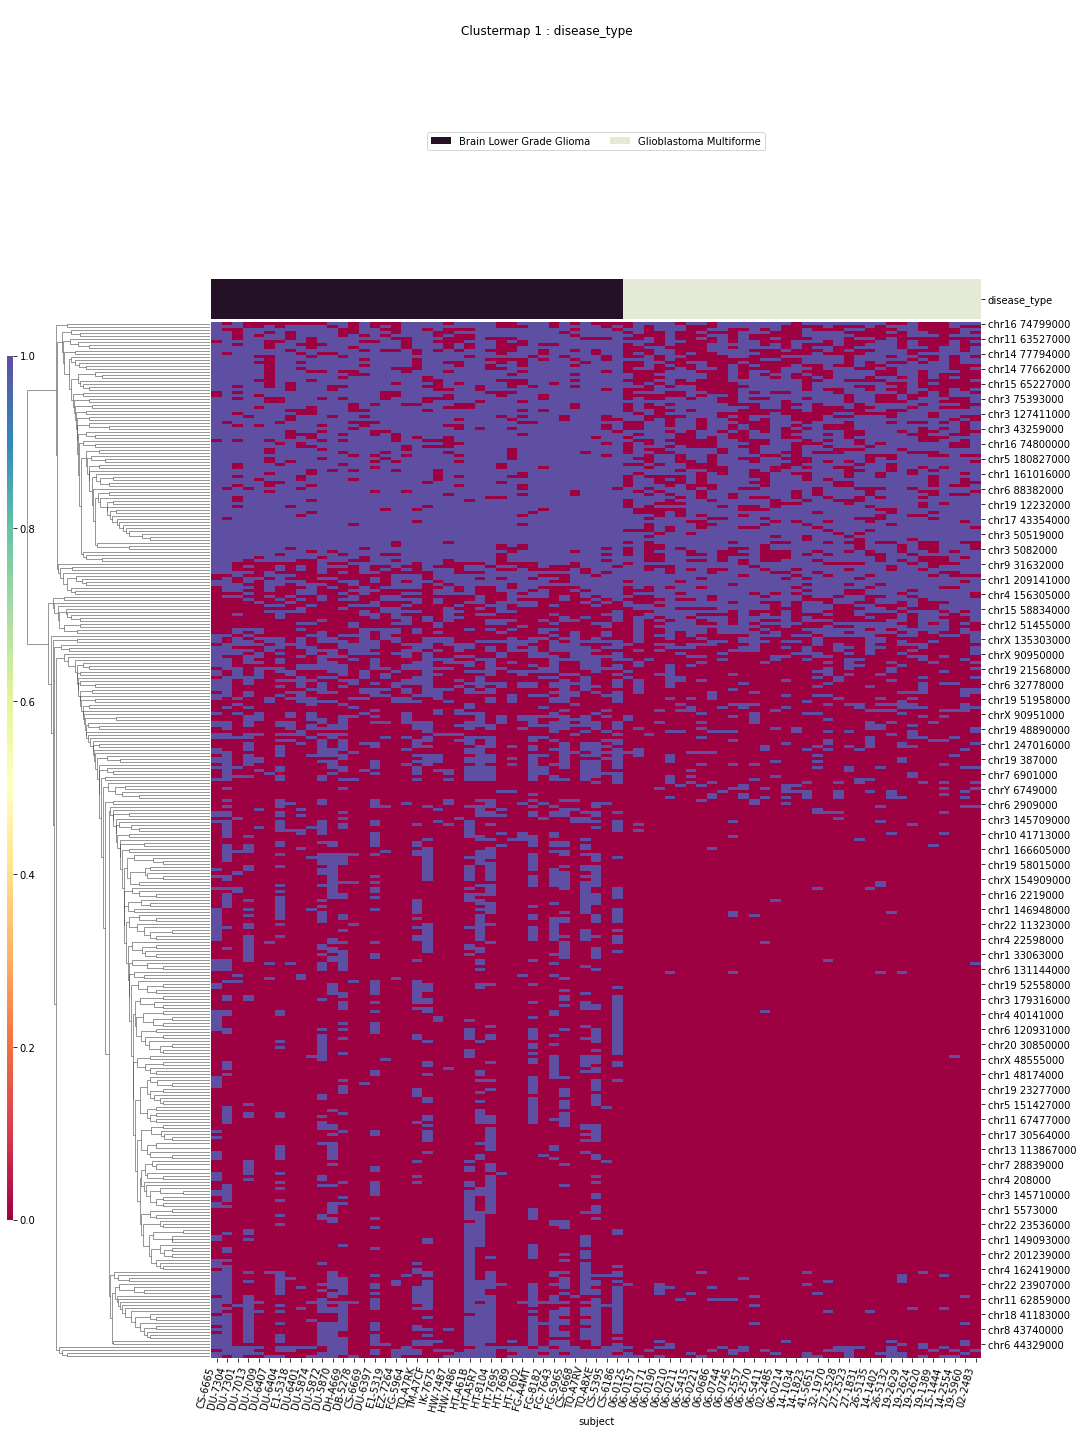

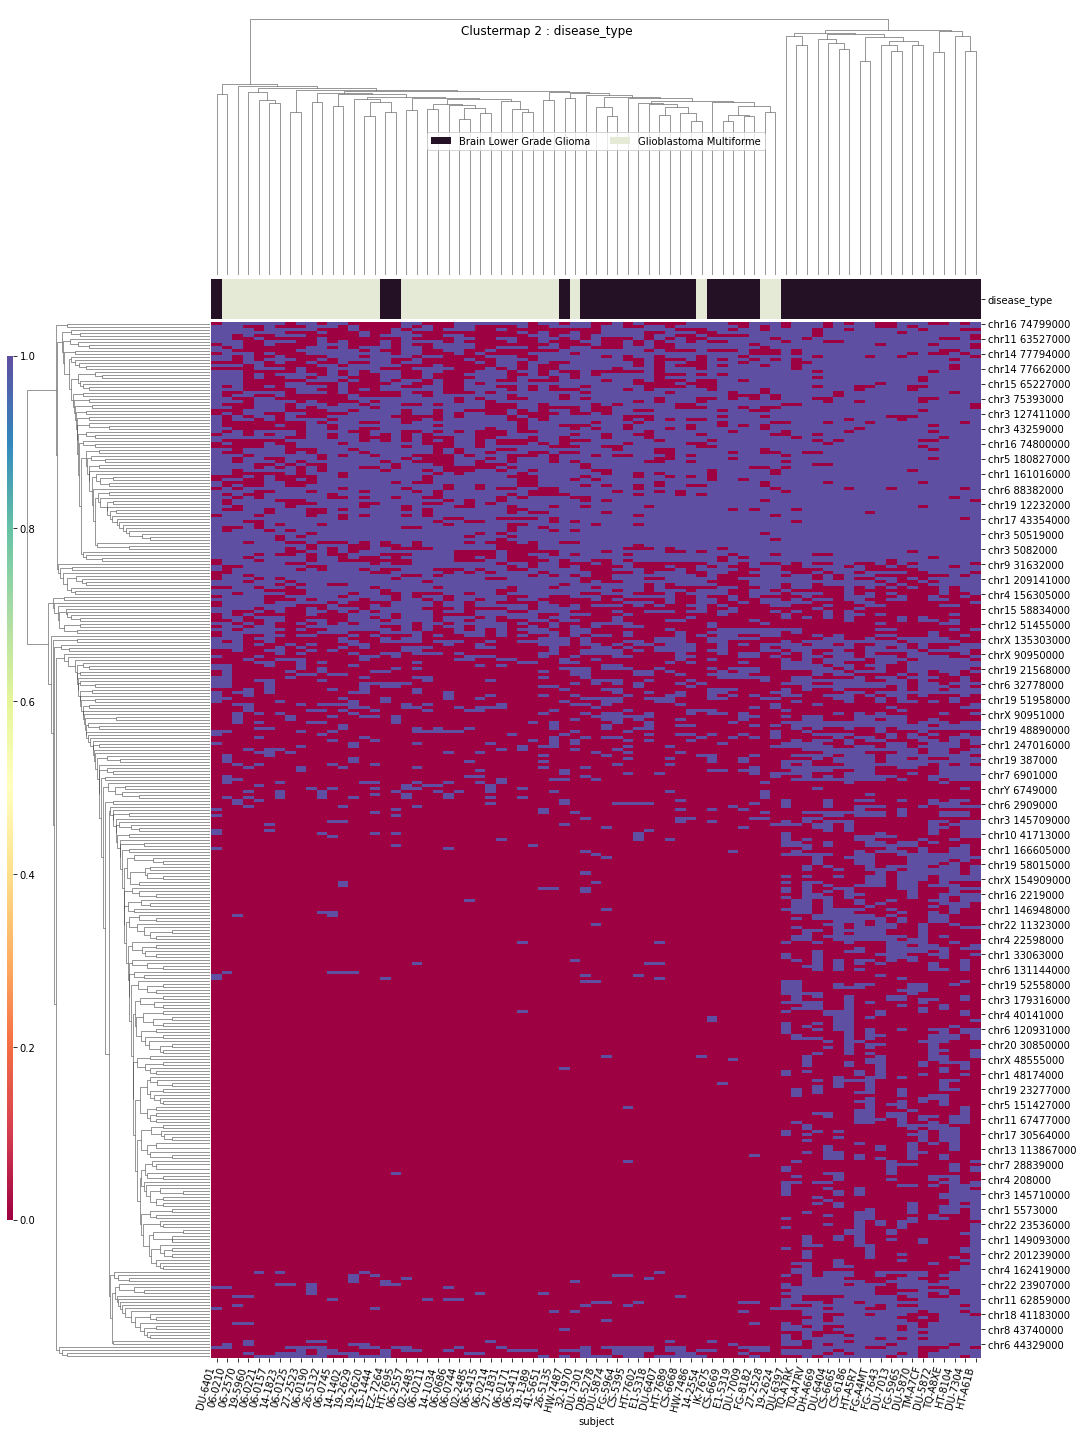

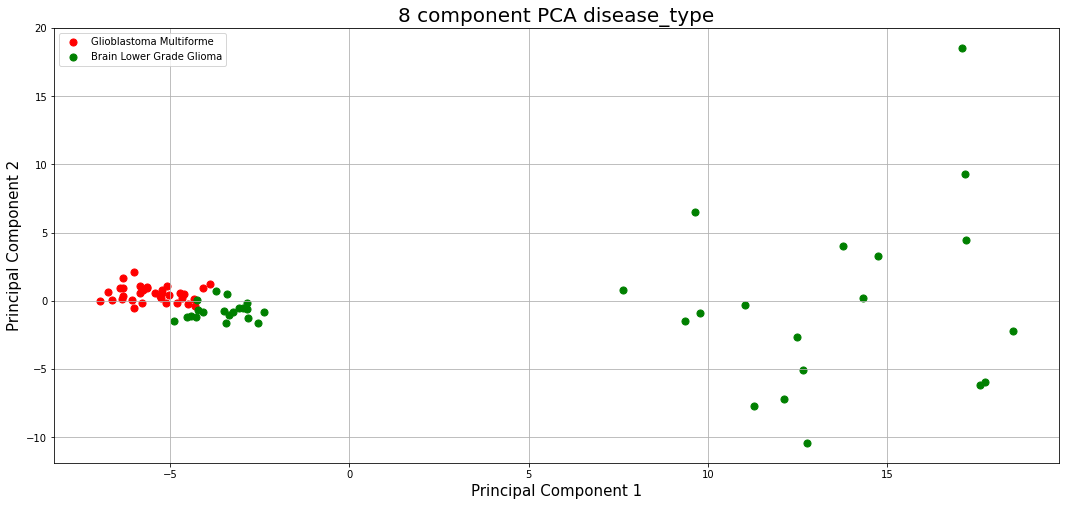

In [113]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [114]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:03:28'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 111360000' 'chr1 145932000' 'chr1 146948000'
 'chr1 147107000' 'chr1 156179000' 'chr1 209141000' 'chr1 246082000'
 'chr1 29338000' 'chr1 33063000' 'chr1 75377000' 'chr1 9001000'
 'chr1 99836000' 'chr10 43337000' 'chr10 97416000' 'chr11 24446000'
 'chr11 60714000' 'chr11 61655000' 'chr11 62194000' 'chr11 62858000'
 'chr11 67477000' 'chr12 123492000' 'chr12 56401000' 'chr12 73348000'
 'chr13 95268000' 'chr14 20268000' 'chr15 58834000' 'chr15 65733000'
 'chr16 21222000' 'chr16 2219000' 'chr16 23599000' 'chr16 35204000'
 'chr16 74800000' 'chr17 17610000' 'chr17 43354000' 'chr18 31810000'
 'chr18 41183000' 'chr18 67077000' 'chr18 68106000' 'chr18 69043000'
 'chr19 12232000' 'chr19 20157000' 'chr19 21568000' 'chr19 22283000'
 'chr19 28130000' 'chr19 37007000' 'chr19 37629000' 'chr19 387000'
 'chr19 48889000' 'chr19 51905000' 'chr19 52485000' 'chr19 52558000'
 'chr19 52698000' 'chr19 52873000' 'chr19 54943000' 'chr19 54

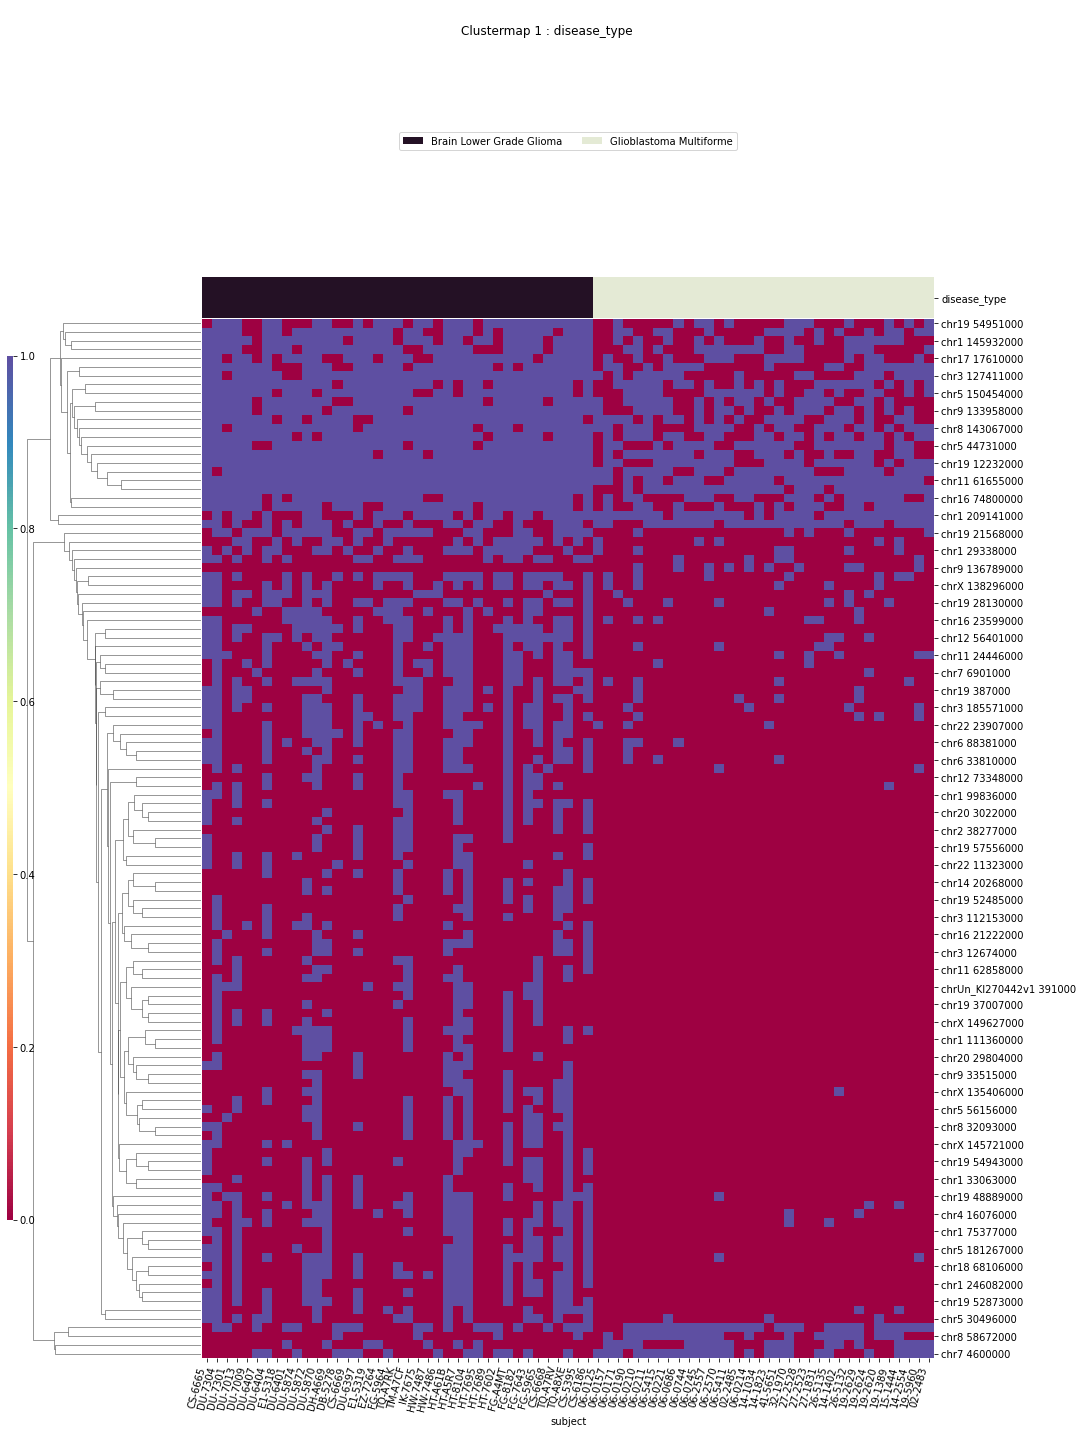

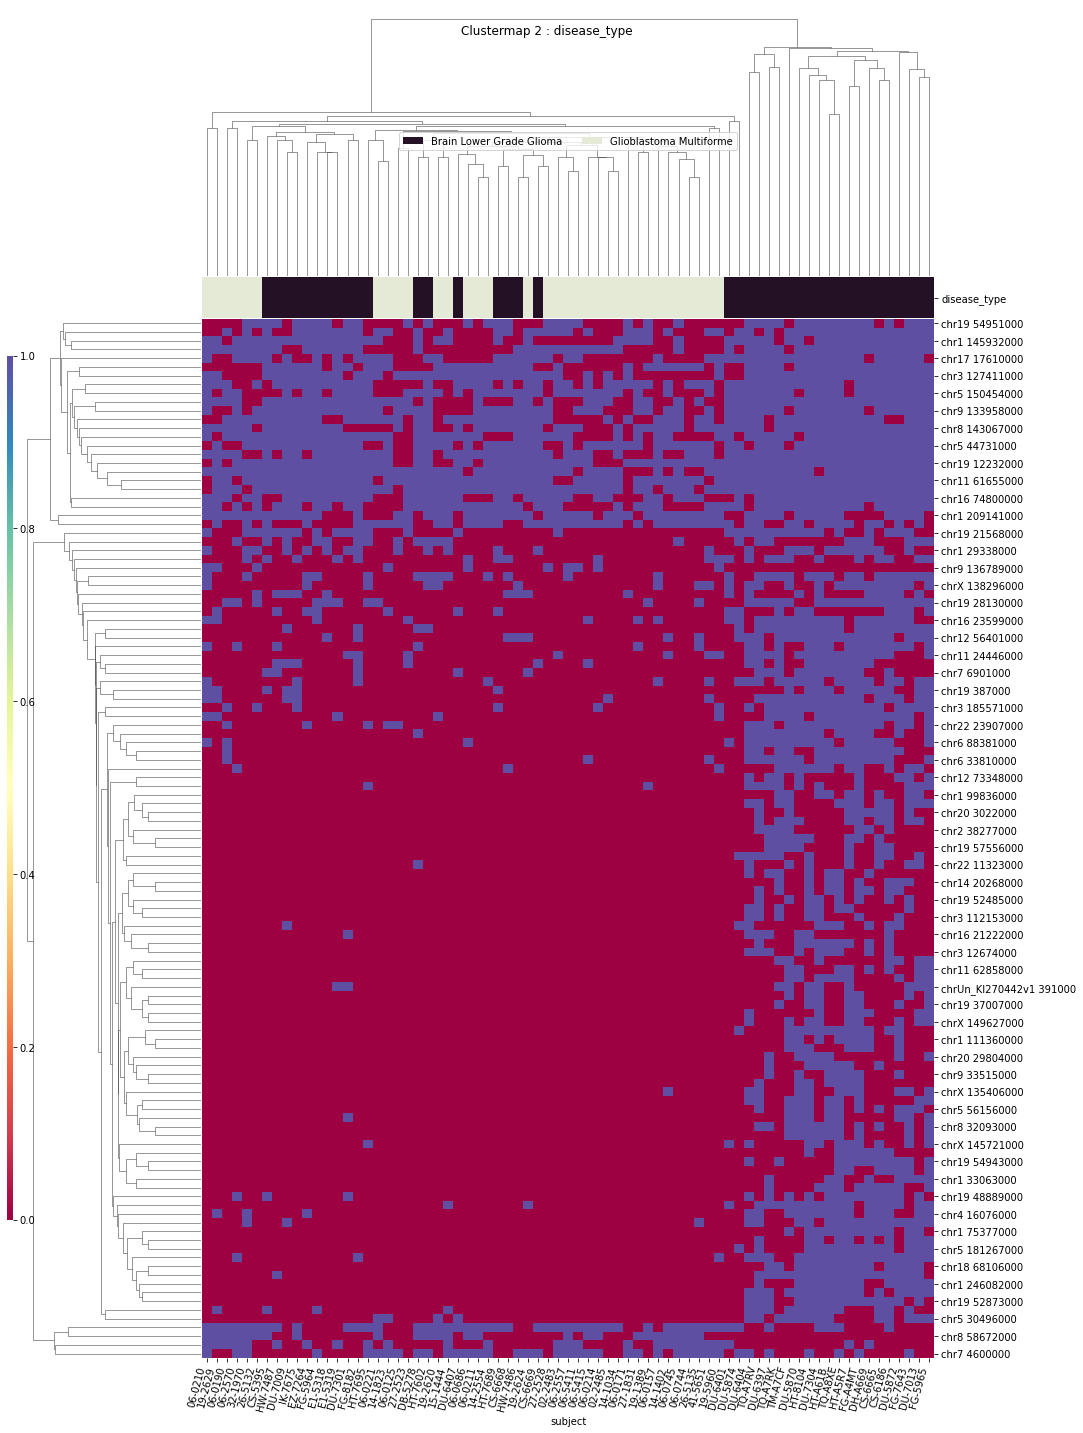

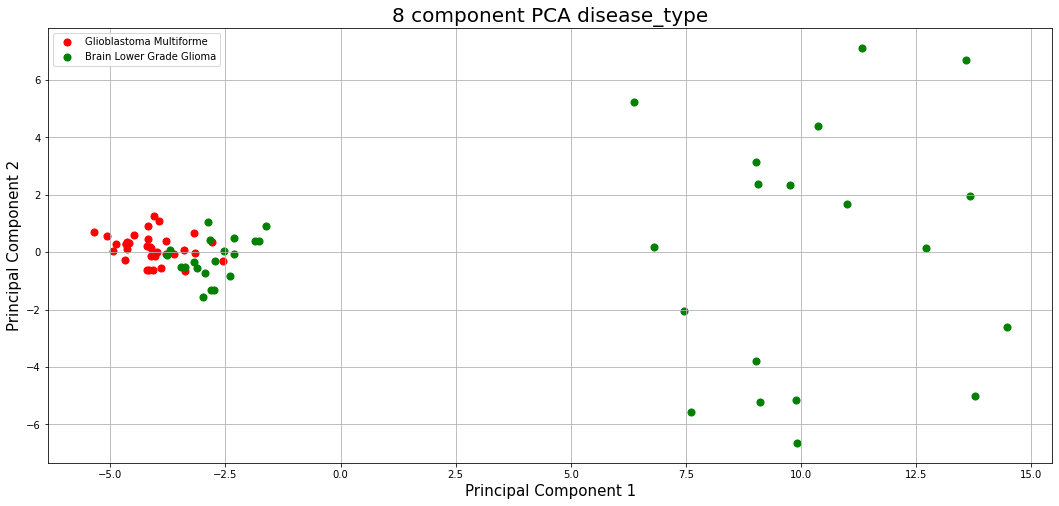

In [115]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [116]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:03:38'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 145932000' 'chr1 246082000' 'chr1 75377000'
 'chr10 43337000' 'chr11 60714000' 'chr12 123492000' 'chr12 56401000'
 'chr13 95268000' 'chr15 58834000' 'chr18 68106000' 'chr18 69043000'
 'chr19 12232000' 'chr19 20157000' 'chr19 21568000' 'chr19 37629000'
 'chr19 387000' 'chr19 48889000' 'chr19 52873000' 'chr19 54943000'
 'chr20 60042000' 'chr22 23907000' 'chr3 127411000' 'chr3 185571000'
 'chr4 16076000' 'chr5 157034000' 'chr5 181267000' 'chr5 56156000'
 'chr7 6901000' 'chr8 143288000' 'chr8 32093000' 'chr8 43740000'
 'chr8 58672000' 'chr9 133958000' 'chr9 136789000' 'chrX 145721000'
 'disease_type' 'subject']


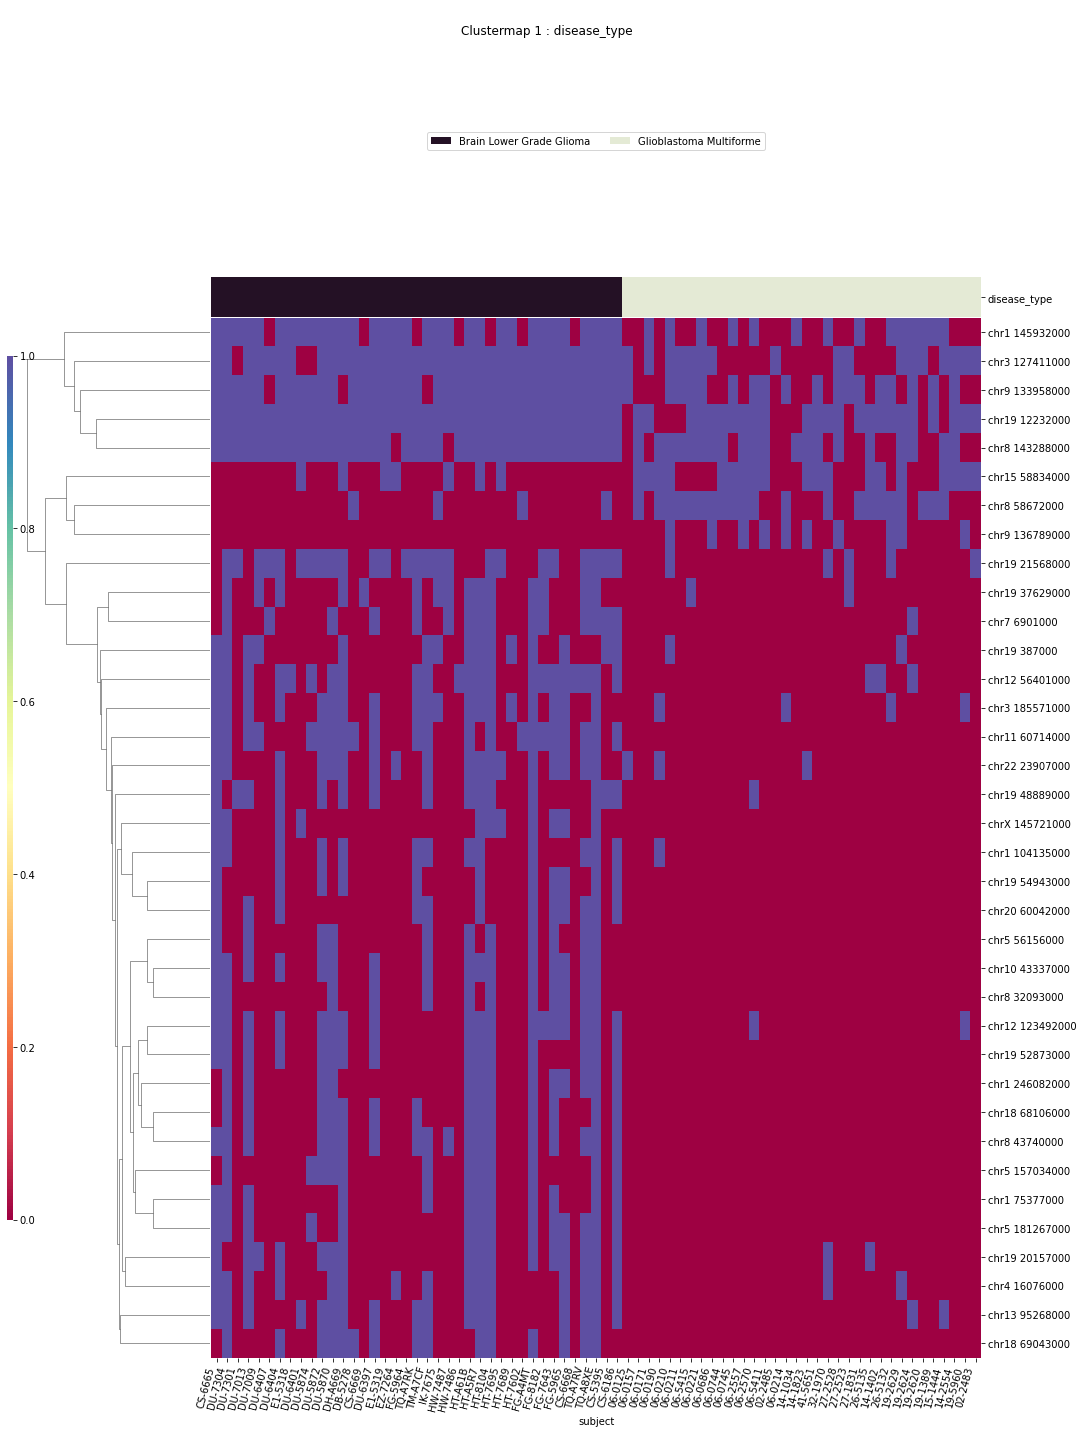

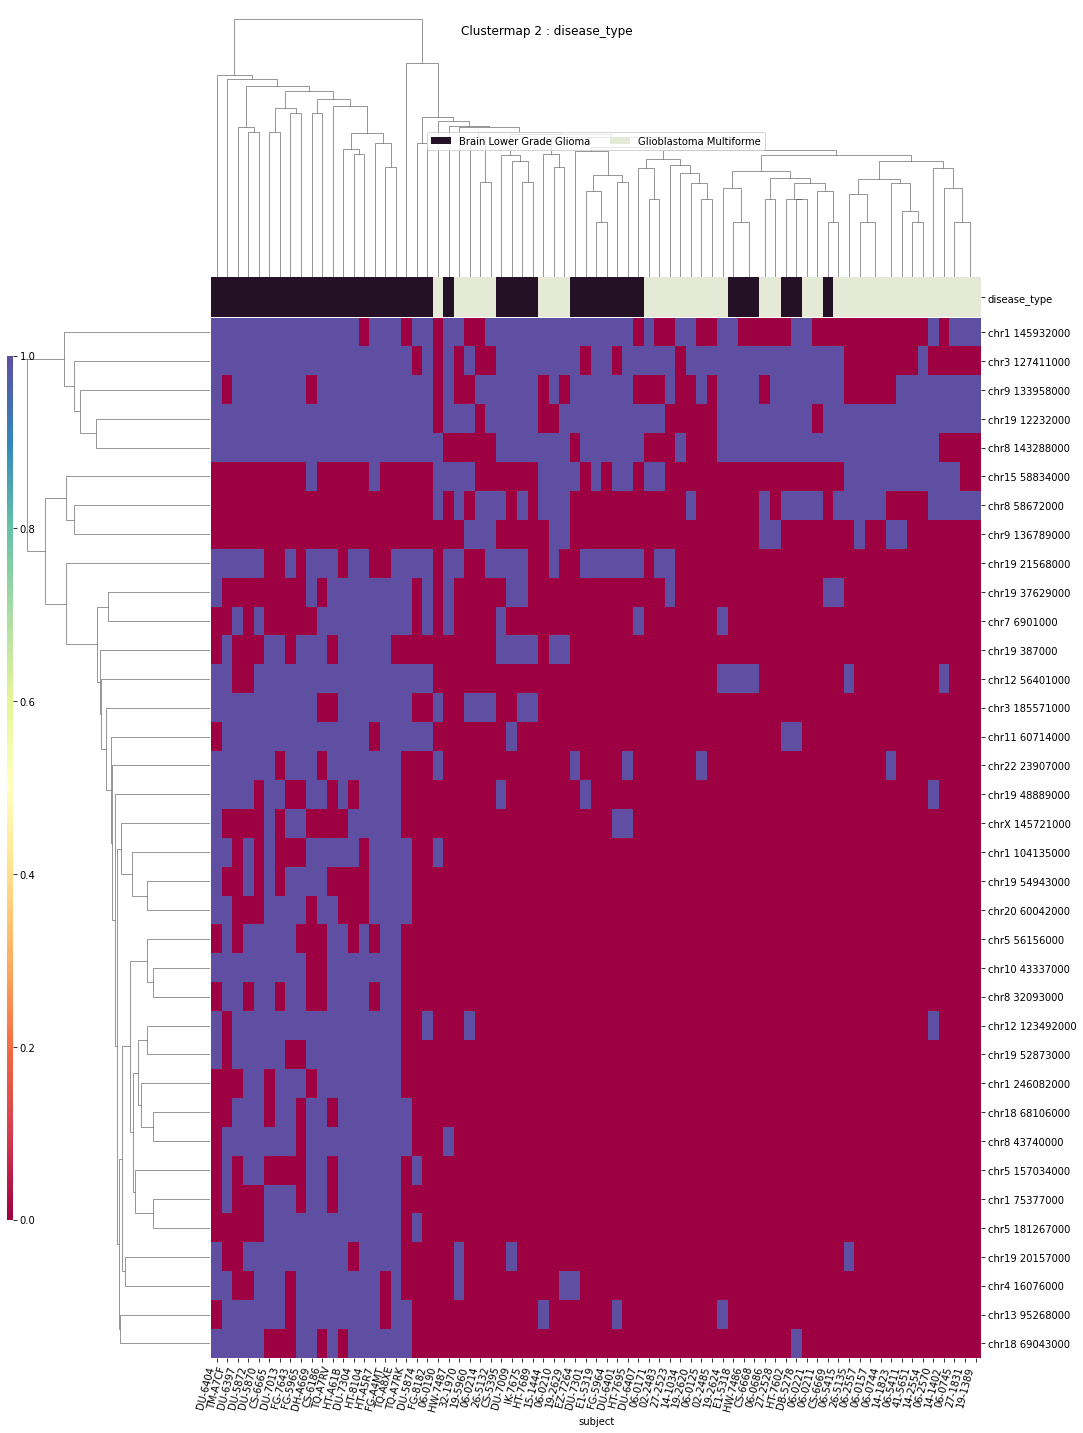

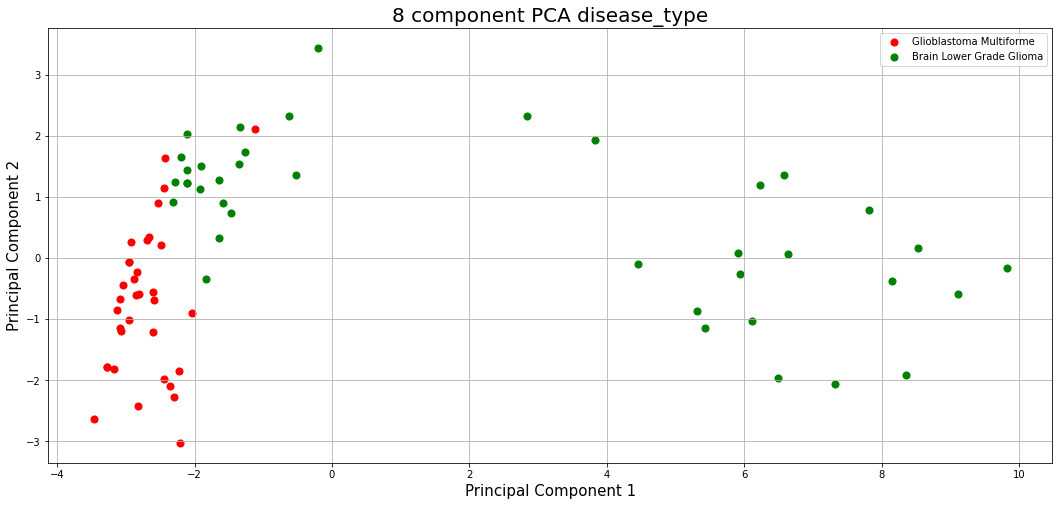

In [117]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [118]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:03:46'

# Load the GPMP data

In [119]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df

chromosome                              chr1                                  \
position                             1409000 1410000 1580000 1581000 3751000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        5       2       0       0       1   
                       SVA_A    Q20        0       0       0       0       0   
                       SVA_B    Q20        0       0       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       0       0       1       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
                       SVA_E    Q20        0       0       0       0       0   
                       SVA_F    Q20        0       0       0       0       0   

chromosome                                                                    \
position                             5573000 6304000 6306000 6714000 6716000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0       0   
                       SVA_A    Q20        0       2       4       3       4   
                       SVA_B    Q20        0       1       2       3       3   
                       SVA_C    Q20        0       2       2       3       3   
                       SVA_D    Q20        0       2       3       3       3   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       3       3       1       5   
                       SVA_C    Q20        0       4       3       0       5   
                       SVA_D    Q20        0       4       3       0       5   
                       SVA_E    Q20        0       4       3       0       5   
                       SVA_F    Q20        0       4       0       0       3   

chromosome                            ...     chrY                             \
position                              ... 12879000 13103000 13104000 15774000   
sample          pup    hkle     mapq  ...                                       
SF12149_S1L1_N  paired HERVK113 Q20   ...        0        0        1        1   
                       SVA_A    Q20   ...        4        0        0        0   
                       SVA_B    Q20   ...        3        0        0        0   
                       SVA_C    Q20   ...        4        0        0        0   
                       SVA_D    Q20   ...        4        0        0        0   
...                                   ...      ...      ...      ...      ...   
SF12656_S11L4_N paired SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
                       SVA_E    Q20   ...        0        0        0        0   
                       SVA_F    Q20   ...        0        0        0        0   

chromosome                                                                \
position                             19535000 19536000 19699000 19700000   
sample          pup    hkle     mapq                                       
SF12149_S1L1_N  paired HERVK113 Q20         0        0        2        3   
                       SVA_A    Q20         0        3        0        0   
                       SVA_B    Q20         0        4        0        0   
                       SVA_C    Q20         0        3        0        0   
                       SVA_D    Q20         0        3        0        0   
...            

In [120]:
gpmp_df.reset_index(inplace=True)
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       5       2       0   
1            SF12149_S1L1_N  paired     SVA_A  Q20       0       0       0   
2            SF12149_S1L1_N  paired     SVA_B  Q20       0       0       0   
3            SF12149_S1L1_N  paired     SVA_C  Q20       0       0       0   
4            SF12149_S1L1_N  paired     SVA_D  Q20       0       0       0   
..                      ...     ...       ...  ...     ...     ...     ...   
93          SF12656_S11L4_N  paired     SVA_B  Q20       0       0       0   
94          SF12656_S11L4_N  paired     SVA_C  Q20       0       0       0   
95          SF12656_S11L4_N  paired     SVA_D  Q20       0       0       0   
96          SF12656_S11L4_N  paired     SVA_E  Q20       0       0       0   
97          SF12656_S11L4_N  paired     SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 12879000 13103000 13104000 15774000   
0                0       1       0  ...        0        0        1        1   
1                0       0       0  ...        4        0        0        0   
2                0       0       0  ...        3        0        0        0   
3                0       0       0  ...        4        0        0        0   
4                0       0       0  ...        4        0        0        0   
..             ...     ...     ...  ...      ...      ...      ...      ...   
93               1       0       0  ...        0        0        0        0   
94               0       0       0  ...        0        0        0        0   
95               0       0       0  ...        0        0        0        0   
96               0       0       0  ...        0        0        0        0   
97               0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        3        0        0  
1                 0        3        0        0        1        0  
2                 0        4        0        0        1        0  
3                 0        3        0        0        1        0  
4                 0        3        0        0        1        0  
..              ...      ...      ...      ...      ...      ...  
93                0        0        0        0        0        0  
94                0        0        0        0        0        0  
95                0        0        0        0        0        0  
96                0        0        0        0        0        0  
97                0        0        0        0        0        0  

[98 rows x 6046 columns]

In [121]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       5       2       0   
7            SF12210_S2L1_N  paired  HERVK113  Q20       5       1       4   
14           SF12255_S7L2_N  paired  HERVK113  Q20       3       1       3   
21           SF12271_S8L2_N  paired  HERVK113  Q20       3       1       3   
28           SF12288_S1L1_N  paired  HERVK113  Q20       9       0      11   
35           SF12333_S2L1_N  paired  HERVK113  Q20      10       8       3   
42           SF12407_S1L1_N  paired  HERVK113  Q20       8       9       8   
49           SF12430_S2L1_N  paired  HERVK113  Q20       4       7      12   
56           SF12460_S8L3_N  paired  HERVK113  Q20       2       1       7   
63           SF12480_S7L3_N  paired  HERVK113  Q20       4       1       3   
70           SF12495_S9L3_N  paired  HERVK113  Q20       6       4       2   
77           SF12577_S6L2_N  paired  HERVK113  Q20       6       5       7   
84          SF12634_S10L4_N  paired  HERVK113  Q20       3       1      13   
91          SF12656_S11L4_N  paired  HERVK113  Q20       6       1       5   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 12879000 13103000 13104000 15774000   
0                0       1       0  ...        0        0        1        1   
7                0       0       0  ...        0        0        0        0   
14               0       1       1  ...        0        0        5        1   
21               0       0       0  ...        0        2        1        1   
28               0       0       1  ...        0        1        1        0   
35               0       0       4  ...        0        0        0        0   
42               0       5       0  ...        0        0        0        0   
49               0       1       0  ...        0        0        0        0   
56               0       1       0  ...        0        0        0        0   
63               0       0       0  ...        0        0        2        0   
70               0       0       0  ...        0        0        0        0   
77               0       0       1  ...        0        2        4        0   
84               0       0       1  ...        0        1        5        0   
91               0       1       0  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        3        0        0  
7                 0        0        0        0        0        0  
14                0        0        0        2        0        0  
21                0        0        0        1        0        1  
28                0        0        4        1        0        3  
35                0        0        0        0        0        0  
42                0        0        0        0        0        0  
49                0        0        0        0        0        0  
56                0        0        0        0        0        0  
63                1        0        1        2        0        1  
70                0        0        0        4        0        0  
77                0        0        0        4        0        2  
84                0        0        1        1        0        0  
91                0        0        0        0        0        0  

[14 rows x 6046 columns]

In [122]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

<ipython-input-122-9c38aa8e9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df['subject']=gpmp_df['sample'].str[0:7]


0     SF12149
7     SF12210
14    SF12255
21    SF12271
28    SF12288
35    SF12333
42    SF12407
49    SF12430
56    SF12460
63    SF12480
70    SF12495
77    SF12577
84    SF12634
91    SF12656
Name: subject, dtype: object

In [123]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df #.head()

chromosome                                      chr1                          \
position                                     1409000 1410000 1580000 1581000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        5       2       0       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        5       1       4       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        3       1       3       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        3       1       3       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        9       0      11       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20       10       8       3       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        8       9       8       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        4       7      12       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        2       1       7       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        4       1       3       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        6       4       2       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        6       5       7       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        3       1      13       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        6       1       5       0   

chromosome                                                                    \
position                                     3751000 5573000 6304000 6306000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        1       0       0       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        1       1       0       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        0       1       3       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       4       2       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        5       0       0       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        1       0       0       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        1       0       1       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        0       1       1       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       1       0       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        1       0       0       0   

chromosome                                                    ...     chrY  \
position                                     6714000 6716000  ... 12879000   
subject sample          pup    hkle     mapq                  ...            
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       0  ...        0   
SF12656 SF12656_S11L4_N paired

In [124]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

,,,,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,...,chrY 12879000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000
subject,sample,pup,hkle,mapq,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,paired,HERVK113,Q20,5,2,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,2,3,0,0
SF12210,SF12210_S2L1_N,paired,HERVK113,Q20,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,SF12255_S7L2_N,paired,HERVK113,Q20,3,1,3,0,1,1,0,0,0,0,...,0,0,5,1,0,0,0,2,0,0
SF12271,SF12271_S8L2_N,paired,HERVK113,Q20,3,1,3,0,0,0,0,0,0,0,...,0,2,1,1,0,0,0,1,0,1
SF12288,SF12288_S1L1_N,paired,HERVK113,Q20,9,0,11,0,0,1,3,0,0,0,...,0,1,1,0,0,0,4,1,0,3
SF12333,SF12333_S2L1_N,paired,HERVK113,Q20,10,8,3,0,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,SF12407_S1L1_N,paired,HERVK113,Q20,8,9,8,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12430,SF12430_S2L1_N,paired,HERVK113,Q20,4,7,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12460,SF12460_S8L3_N,paired,HERVK113,Q20,2,1,7,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,...,chrY 12879000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,5,2,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,2,3,0,0
SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,SF12255_S7L2_N,3,1,3,0,1,1,0,0,0,0,...,0,0,5,1,0,0,0,2,0,0
SF12271,SF12271_S8L2_N,3,1,3,0,0,0,0,0,0,0,...,0,2,1,1,0,0,0,1,0,1
SF12288,SF12288_S1L1_N,9,0,11,0,0,1,3,0,0,0,...,0,1,1,0,0,0,4,1,0,3
SF12333,SF12333_S2L1_N,10,8,3,0,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,SF12407_S1L1_N,8,9,8,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12430,SF12430_S2L1_N,4,7,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12460,SF12460_S8L3_N,2,1,7,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [126]:
gpmp_counts=pd.read_csv("20210604-GPMP-GBM/raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [127]:
gpmp_df.reset_index(inplace=True)
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,5,2,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,3,0,0,660620929
SF12210,SF12210_S2L1_N,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,SF12255_S7L2_N,3,1,3,0,1,1,0,0,0,0,...,0,5,1,0,0,0,2,0,0,688035696
SF12271,SF12271_S8L2_N,3,1,3,0,0,0,0,0,0,0,...,2,1,1,0,0,0,1,0,1,751091228
SF12288,SF12288_S1L1_N,9,0,11,0,0,1,3,0,0,0,...,1,1,0,0,0,4,1,0,3,1101793738
SF12333,SF12333_S2L1_N,10,8,3,0,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,SF12407_S1L1_N,8,9,8,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,SF12430_S2L1_N,4,7,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,SF12460_S8L3_N,2,1,7,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,960343467


In [128]:
gpmp_df=gpmp_df.droplevel('sample',axis='index')
gpmp_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,5,2,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,3,0,0,660620929
SF12210,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,3,1,3,0,1,1,0,0,0,0,...,0,5,1,0,0,0,2,0,0,688035696
SF12271,3,1,3,0,0,0,0,0,0,0,...,2,1,1,0,0,0,1,0,1,751091228
SF12288,9,0,11,0,0,1,3,0,0,0,...,1,1,0,0,0,4,1,0,3,1101793738
SF12333,10,8,3,0,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,8,9,8,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,4,7,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,2,1,7,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,960343467


In [129]:
gpmp_df.shape

(14, 6043)

In [130]:
gpmp_df=gpmp_df.loc[:, (gpmp_df != 0).any(axis=0)]

In [131]:
gpmp_df.shape

(14, 2022)

In [132]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


<ipython-input-132-5f77c92ad960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [133]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,chr1 1409000,chr1 1410000,chr1 1580000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 7953000,chr1 8502000,chr1 8912000,chr1 9001000,...,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,7.57,3.03,0.00,1.51,0.00,0.00,1.51,0.00,0.00,3.03,...,0.00,0.00,0.00,0.00,1.51,1.51,0.00,3.03,4.54,0.00
SF12210,8.37,1.67,6.69,0.00,0.00,0.00,1.67,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12255,4.36,1.45,4.36,1.45,1.45,0.00,1.45,0.00,1.45,0.00,...,0.00,1.45,0.00,0.00,7.27,1.45,0.00,0.00,2.91,0.00
SF12271,3.99,1.33,3.99,0.00,0.00,0.00,0.00,0.00,0.00,3.99,...,0.00,0.00,2.66,2.66,1.33,1.33,0.00,0.00,1.33,1.33
SF12288,8.17,0.00,9.98,0.00,0.91,2.72,0.91,0.00,0.00,0.91,...,0.00,0.91,2.72,0.91,0.91,0.00,0.00,3.63,0.91,2.72
SF12333,8.36,6.69,2.51,0.00,3.34,1.67,0.00,0.00,0.00,0.84,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12407,6.80,7.65,6.80,4.25,0.00,0.00,0.00,0.85,0.00,3.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12430,3.15,5.52,9.46,0.79,0.00,0.00,0.00,0.00,0.00,0.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12460,2.08,1.04,7.29,1.04,0.00,1.04,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [134]:
gpmp_binary_df=(gpmp_df>=threshold).replace([False,True],[0,1]).copy()
gpmp_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 3751000,chr1 5573000,chr1 6304000,chr1 7953000,chr1 8502000,chr1 8912000,chr1 9001000,...,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
SF12210,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
SF12271,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SF12288,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
SF12333,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SF12430,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12460,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
gpmp_binary_df.shape

(14, 2021)

In [136]:
gpmp_binary_df=gpmp_binary_df.loc[:, (gpmp_binary_df != 0).any(axis=0)]
gpmp_binary_df.shape

(14, 841)

In [137]:
gpmp_binary_df.loc[:,'disease_type']='GBM'
gpmp_binary_df

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,chr1 1409000,chr1 1410000,chr1 1580000,chr1 3751000,chr1 5573000,chr1 9001000,chr1 10425000,chr1 10427000,chr1 13362000,chr1 15135000,...,chrX 154909000,chrY 6748000,chrY 6749000,chrY 7179000,chrY 7180000,chrY 12463000,chrY 13104000,chrY 19699000,chrY 19700000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,1,1,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,GBM
SF12210,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,GBM
SF12255,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,GBM
SF12271,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12288,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,GBM
SF12333,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12407,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,GBM
SF12430,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12460,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,GBM


In [138]:
gpmp_binary_df.shape

(14, 842)

In [139]:
both_binary_df=compdf.copy()

In [140]:
both_binary_df.drop(['Triple_group', 'Tissue_sample_location', 'MGMT', 'Age', 'Survival_months',
                     'Vital_status', 'days_to_death', 'gender1','center_name',
                     'race', 'ethnicity', 'gender2', 'RE_names', 'IDH', 'x1p19q', 'TERT',
                     'IDH_1p19q_status', 'WHO_groups',
                     'project_id','primary_diagnosis'], axis='columns',inplace=True)

In [141]:
both_binary_df.set_index(['subject'],inplace=True)
both_binary_df #.head()

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,chrY 12352000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0125,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0171,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TM-A7CF,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,Brain Lower Grade Glioma


In [142]:
both_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,chrY 12352000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0125,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0171,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TM-A7CF,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,1,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,Brain Lower Grade Glioma


In [143]:
both_binary_df=both_binary_df.append(gpmp_binary_df)
both_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,chr7 153314000,chr8 51535000,chr8 65663000,chr8 67311000,chr8_KZ208915v1_fix 1162000,chr9 85574000,chrX 58066000,chrX 113991000,chrX 139341000,chrX 154522000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0.0,0.0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-2485,1,0,0,0,0,0.0,0.0,1,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0125,1,0,1,0,0,0.0,0.0,0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0157,0,0,1,0,0,0.0,0.0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0171,1,0,0,0,0,0.0,0.0,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,1,0,1,0,0,NaN,NaN,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,1,1,0,0,0,NaN,NaN,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,1,1,1,0,0,NaN,NaN,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
both_binary_df.fillna(0, inplace=True)
both_binary_df.reset_index(inplace=True)
both_binary_df.set_index(['subject','disease_type'],inplace=True)
both_binary_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,chr1 10427000,chr1 11891000,...,chr7 153314000,chr8 51535000,chr8 65663000,chr8 67311000,chr8_KZ208915v1_fix 1162000,chr9 85574000,chrX 58066000,chrX 113991000,chrX 139341000,chrX 154522000
subject,disease_type,,,,,,,,,,,,,,,,,,,,,
02-2483,Glioblastoma Multiforme,1,1,1,0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02-2485,Glioblastoma Multiforme,1,0,0,0,0,0.0,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0125,Glioblastoma Multiforme,1,0,1,0,0,0.0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0157,Glioblastoma Multiforme,0,0,1,0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0171,Glioblastoma Multiforme,1,0,0,0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,GBM,1,0,1,0,0,0.0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,GBM,1,1,0,0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,GBM,1,1,1,0,0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
both_binary_df = pd.DataFrame(both_binary_df, dtype=int)
both_binary_df.reset_index(inplace=True)
#both_binary_df.set_index(['subject'],inplace=True)
both_binary_df

,subject,disease_type,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9001000,chr1 9002000,chr1 10029000,chr1 10425000,...,chr7 153314000,chr8 51535000,chr8 65663000,chr8 67311000,chr8_KZ208915v1_fix 1162000,chr9 85574000,chrX 58066000,chrX 113991000,chrX 139341000,chrX 154522000
0,02-2483,Glioblastoma Multiforme,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02-2485,Glioblastoma Multiforme,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,06-0125,Glioblastoma Multiforme,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06-0157,Glioblastoma Multiforme,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06-0171,Glioblastoma Multiforme,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,SF12480,GBM,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,SF12495,GBM,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,SF12577,GBM,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,SF12634,GBM,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


disease_type
T-Testing
Boxplotting
 p : 7.254146375649551e-15  ( t : 10.857133990633347 ) :  chr8 143067000


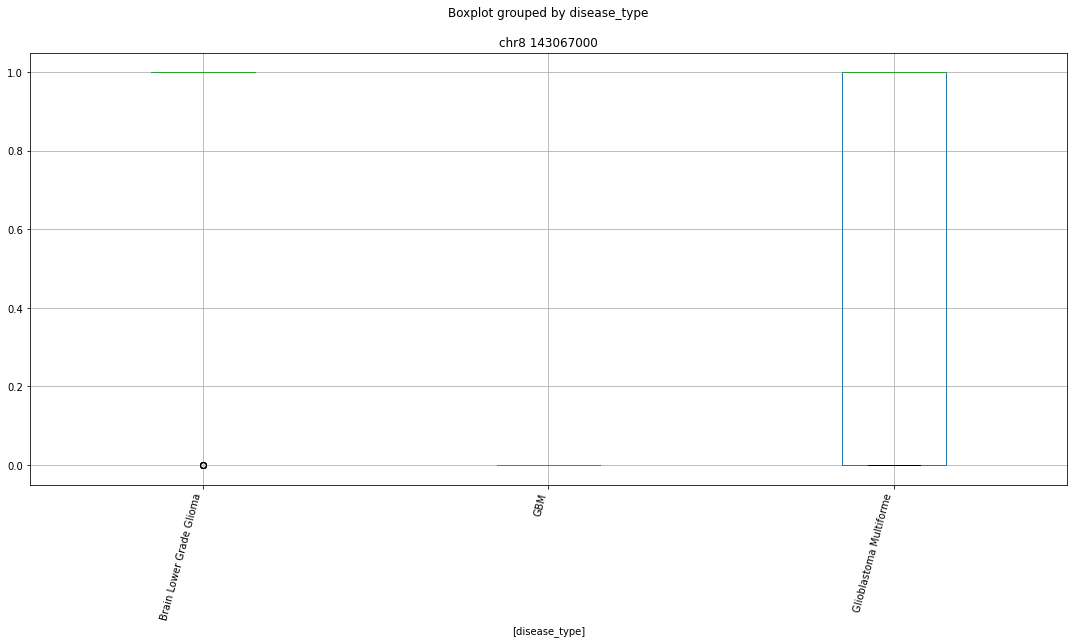

 p : 9.558830127815861e-12  ( t : 9.02542704437487 ) :  chr8 43740000


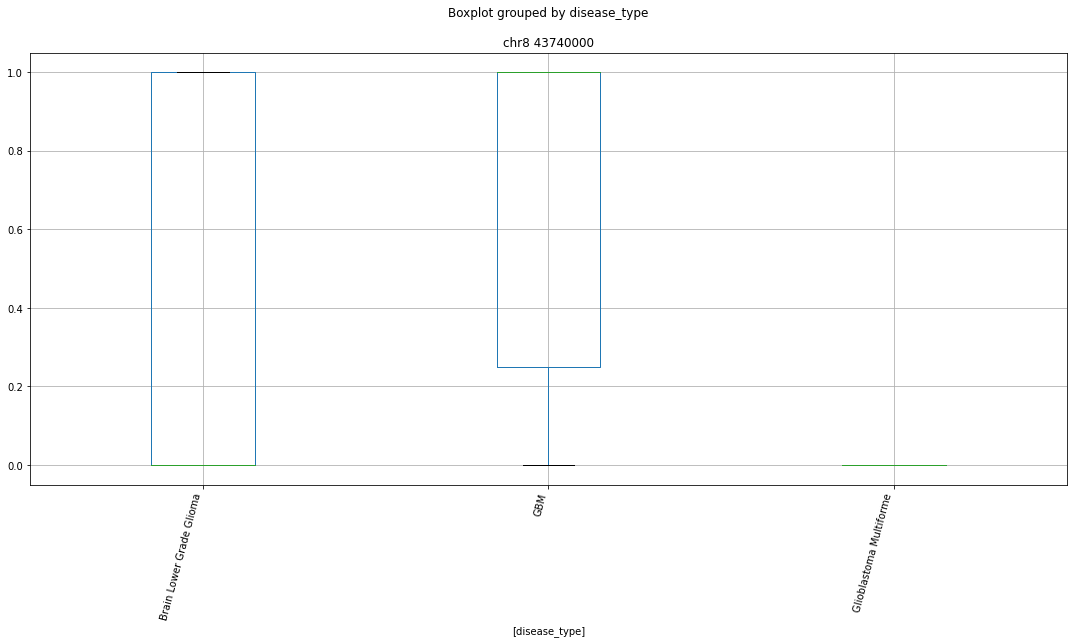

Clustermapping
['chr1 10029000' 'chr1 104135000' 'chr1 10427000' 'chr1 108517000'
 'chr1 108518000' 'chr1 111360000' 'chr1 114059000' 'chr1 1409000'
 'chr1 144451000' 'chr1 145932000' 'chr1 146948000' 'chr1 147106000'
 'chr1 147107000' 'chr1 147240000' 'chr1 147241000' 'chr1 147733000'
 'chr1 149093000' 'chr1 150632000' 'chr1 152256000' 'chr1 152455000'
 'chr1 152456000' 'chr1 15379000' 'chr1 155600000' 'chr1 155635000'
 'chr1 156179000' 'chr1 156181000' 'chr1 156182000' 'chr1 160652000'
 'chr1 160947000' 'chr1 160949000' 'chr1 161016000' 'chr1 161017000'
 'chr1 161315000' 'chr1 165093000' 'chr1 166605000' 'chr1 176395000'
 'chr1 207635000' 'chr1 209129000' 'chr1 209141000' 'chr1 209142000'
 'chr1 224340000' 'chr1 227607000' 'chr1 246082000' 'chr1 247016000'
 'chr1 247582000' 'chr1 25587000' 'chr1 25588000' 'chr1 27829000'
 'chr1 29338000' 'chr1 29359000' 'chr1 29360000' 'chr1 33063000'
 'chr1 3751000' 'chr1 45513000' 'chr1 46395000' 'chr1 48174000'
 'chr1 54637000' 'chr1 5573000' 'chr

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


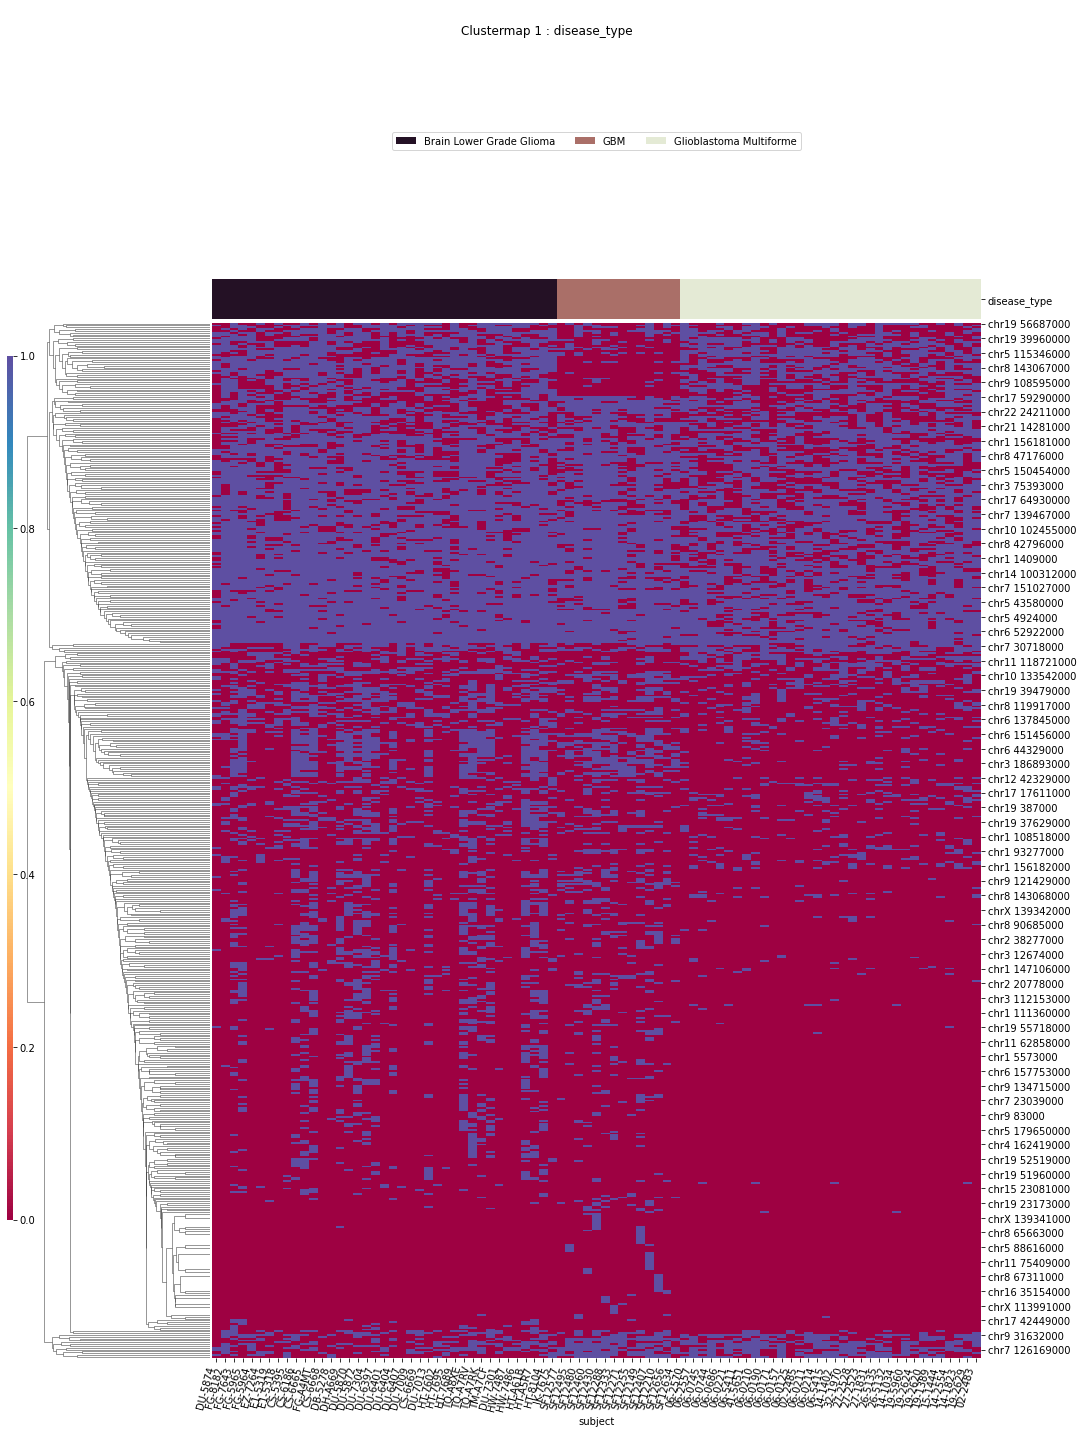

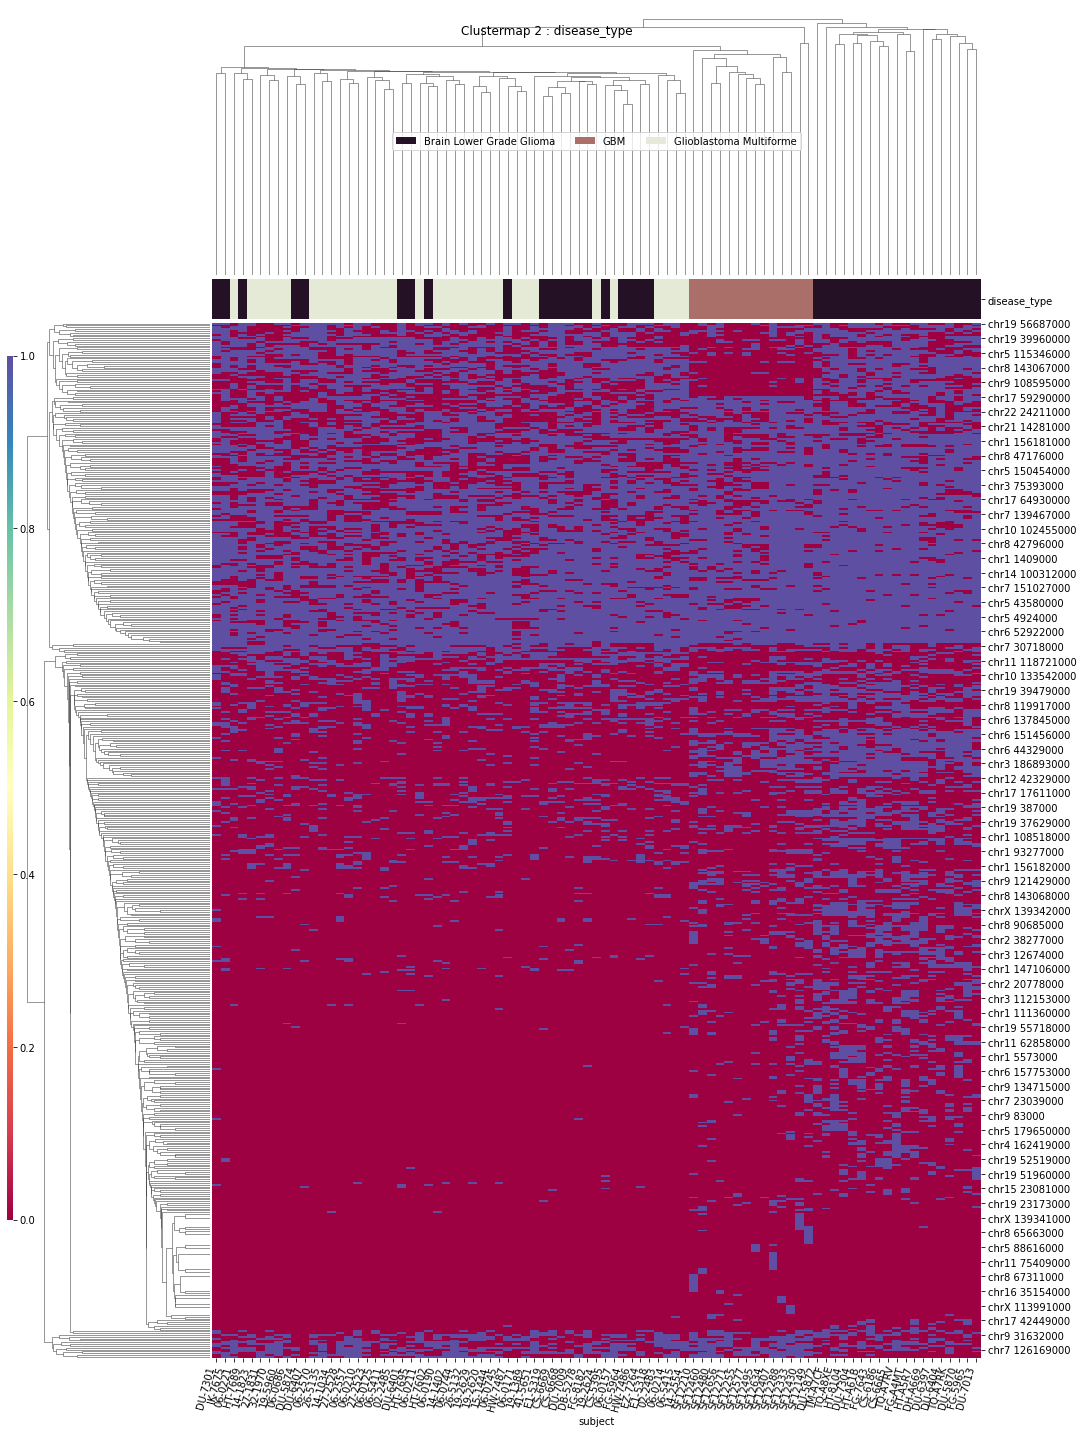

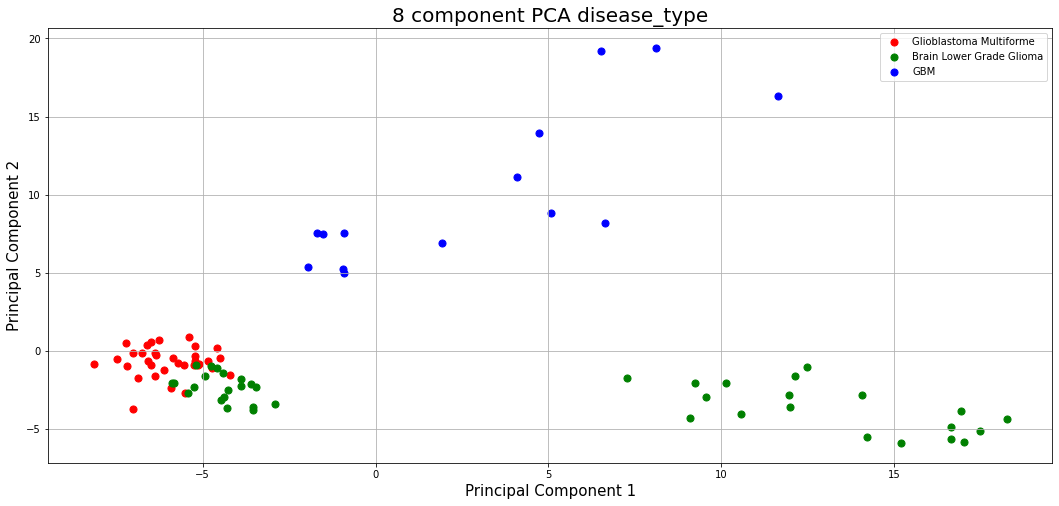

In [146]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [147]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:04:14'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 108517000' 'chr1 111360000' 'chr1 145932000'
 'chr1 146948000' 'chr1 147107000' 'chr1 152455000' 'chr1 155600000'
 'chr1 156179000' 'chr1 160652000' 'chr1 209141000' 'chr1 209142000'
 'chr1 246082000' 'chr1 29338000' 'chr1 29359000' 'chr1 29360000'
 'chr1 33063000' 'chr1 75377000' 'chr1 9001000' 'chr1 93277000'
 'chr1 99836000' 'chr10 133542000' 'chr10 41713000' 'chr10 43337000'
 'chr10 90302000' 'chr10 97416000' 'chr11 24446000' 'chr11 60714000'
 'chr11 61655000' 'chr11 62194000' 'chr11 62858000' 'chr11 67477000'
 'chr12 10572000' 'chr12 118105000' 'chr12 123492000' 'chr12 123493000'
 'chr12 32099000' 'chr12 51455000' 'chr12 56401000' 'chr12 6886000'
 'chr12 73348000' 'chr12_KZ559112v1_alt 111000' 'chr13 18719000'
 'chr13 95268000' 'chr14 20085000' 'chr14 20268000' 'chr14 22725000'
 'chr15 28184000' 'chr15 58834000' 'chr15 65733000' 'chr15 65734000'
 'chr15 78222000' 'chr16 14637000' 'chr16 21222000' 'chr16 2219

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


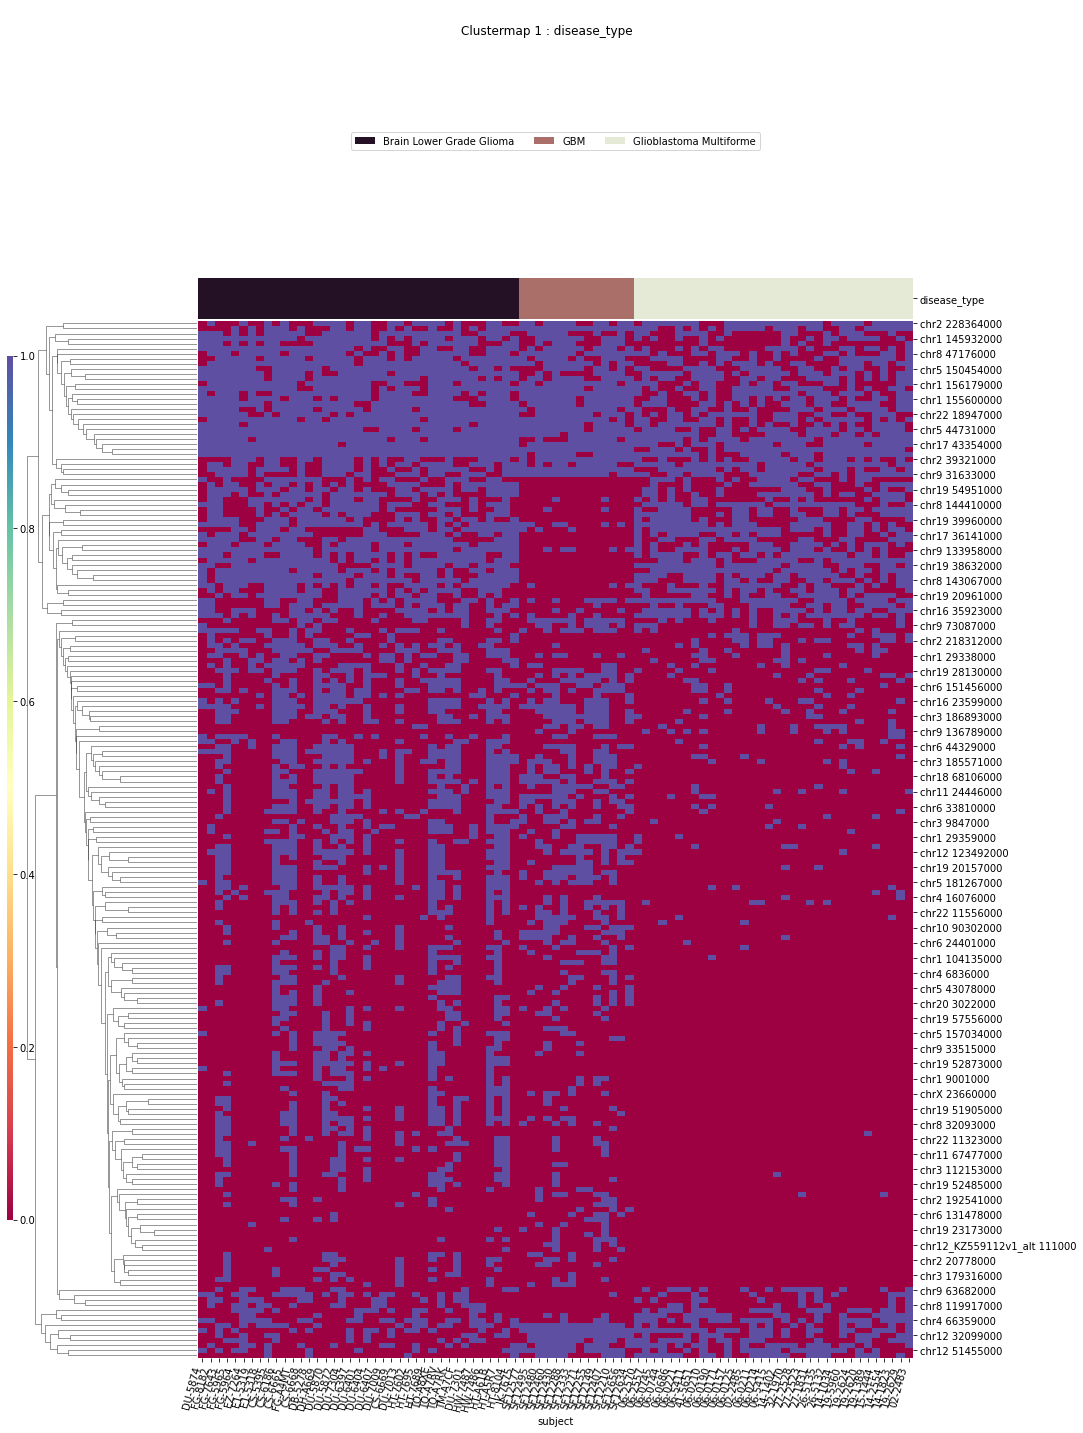

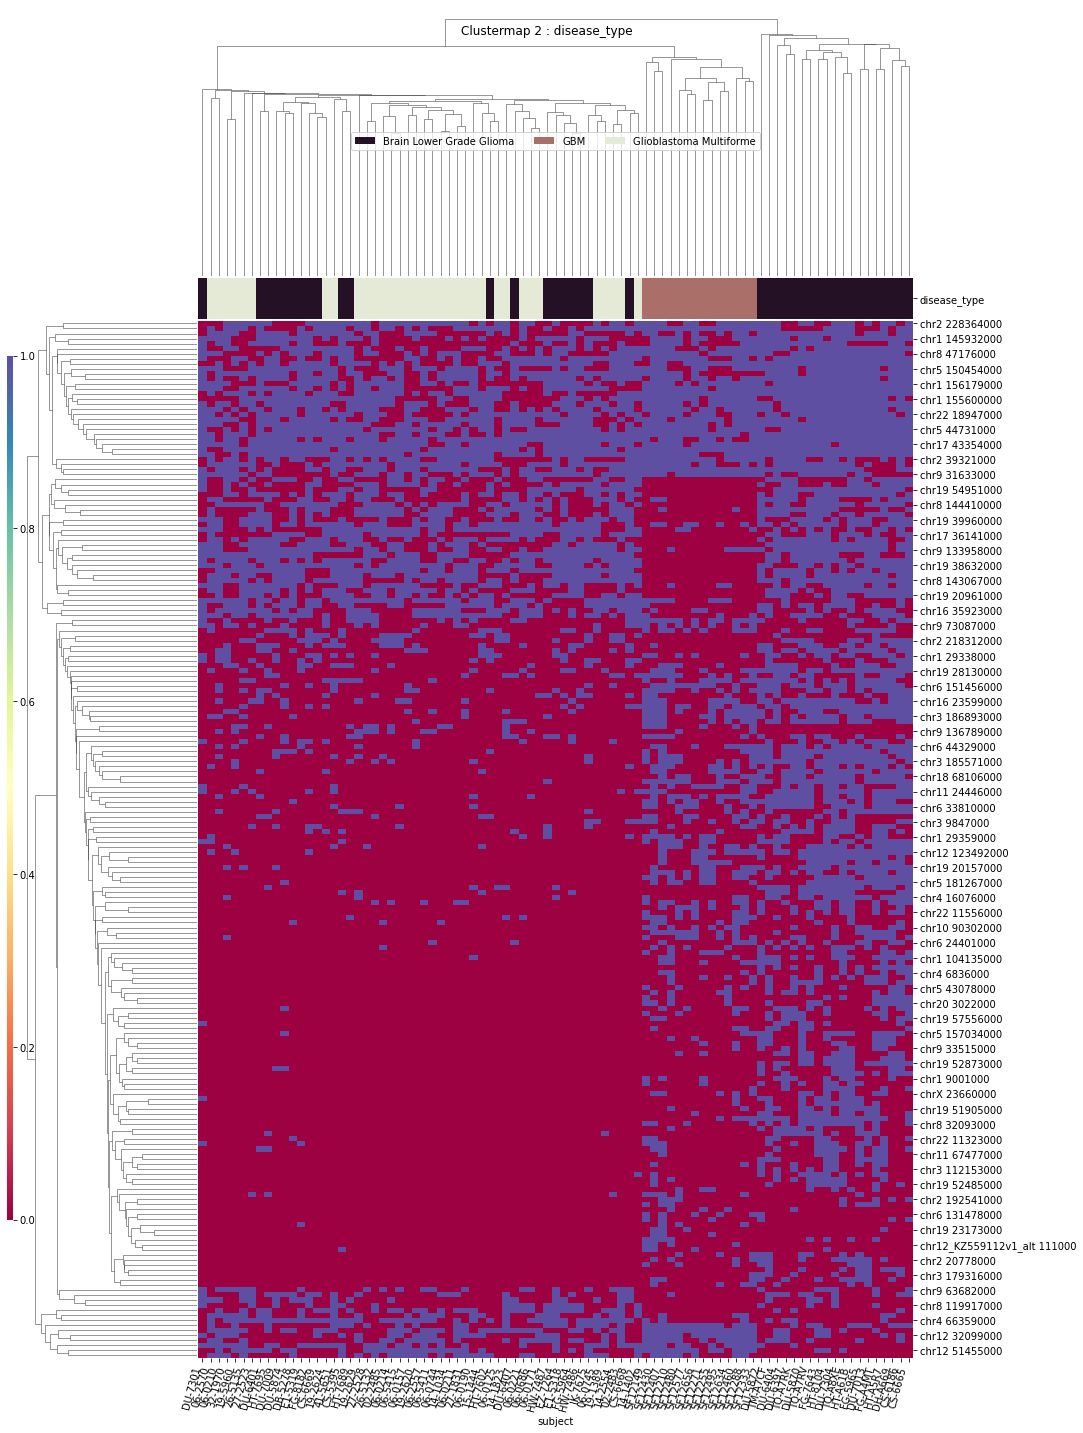

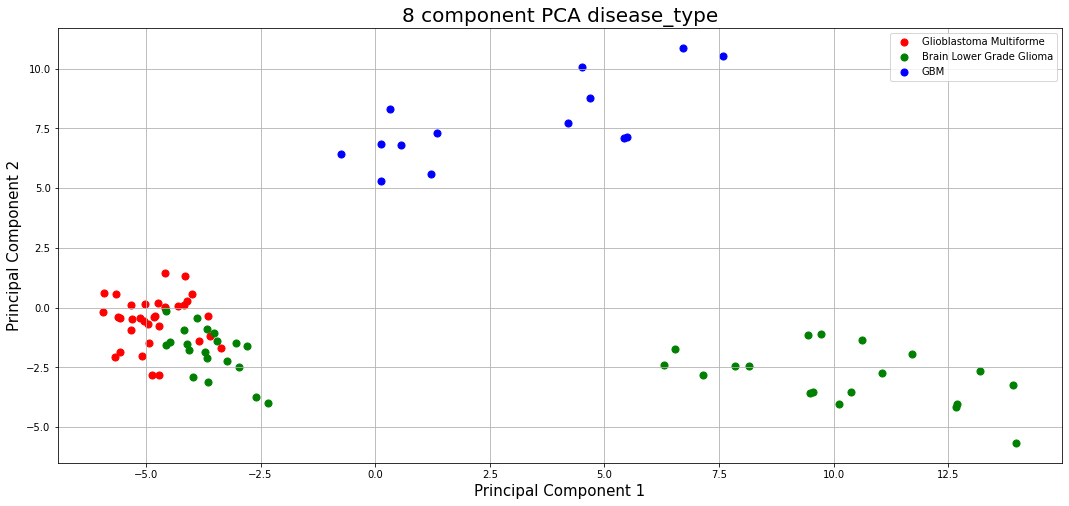

In [148]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [149]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:04:35'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 108517000' 'chr1 145932000' 'chr1 146948000'
 'chr1 160652000' 'chr1 246082000' 'chr1 29359000' 'chr1 75377000'
 'chr1 93277000' 'chr1 99836000' 'chr10 43337000' 'chr10 90302000'
 'chr11 60714000' 'chr12 118105000' 'chr12 123492000' 'chr12 32099000'
 'chr12 51455000' 'chr12 56401000' 'chr12_KZ559112v1_alt 111000'
 'chr13 18719000' 'chr13 95268000' 'chr14 20268000' 'chr14 22725000'
 'chr15 28184000' 'chr15 58834000' 'chr15 65733000' 'chr15 78222000'
 'chr16 14637000' 'chr17 36140000' 'chr17 36141000' 'chr17 46284000'
 'chr18 41183000' 'chr18 68106000' 'chr18 69043000' 'chr19 12232000'
 'chr19 20157000' 'chr19 20961000' 'chr19 21568000' 'chr19 22284000'
 'chr19 37629000' 'chr19 38632000' 'chr19 387000' 'chr19 39960000'
 'chr19 48889000' 'chr19 52520000' 'chr19 52873000' 'chr19 54943000'
 'chr19 54951000' 'chr2 192542000' 'chr2 20778000' 'chr2 38277000'
 'chr20 25551000' 'chr20 3022000' 'chr20 60042000' 'chr22 11556

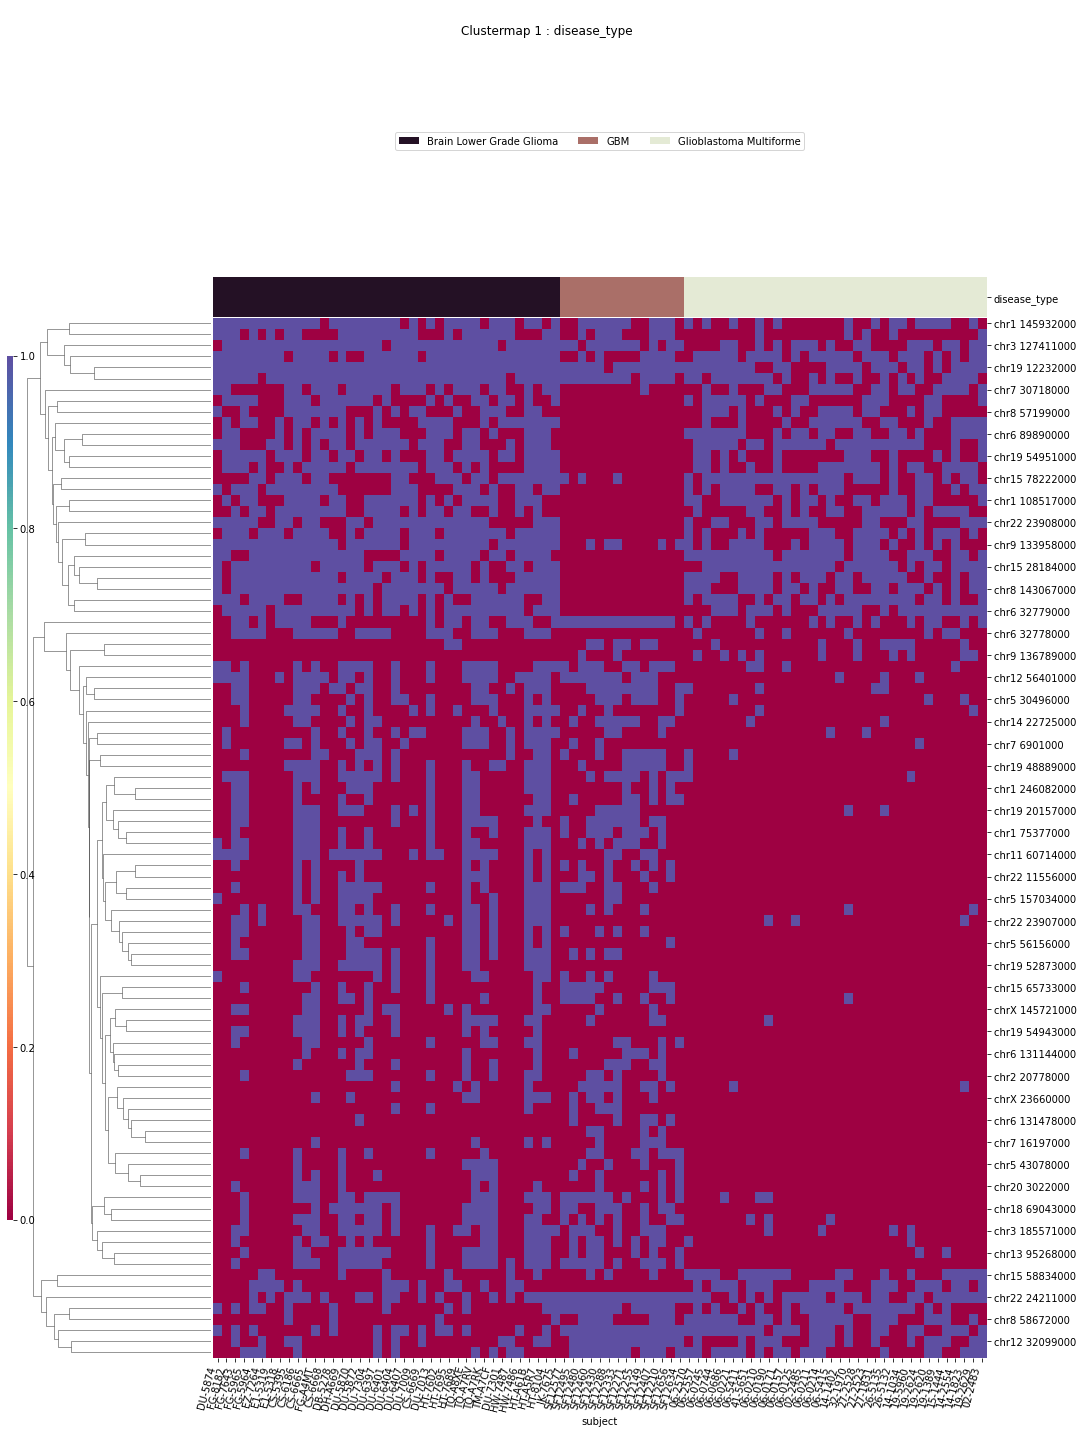

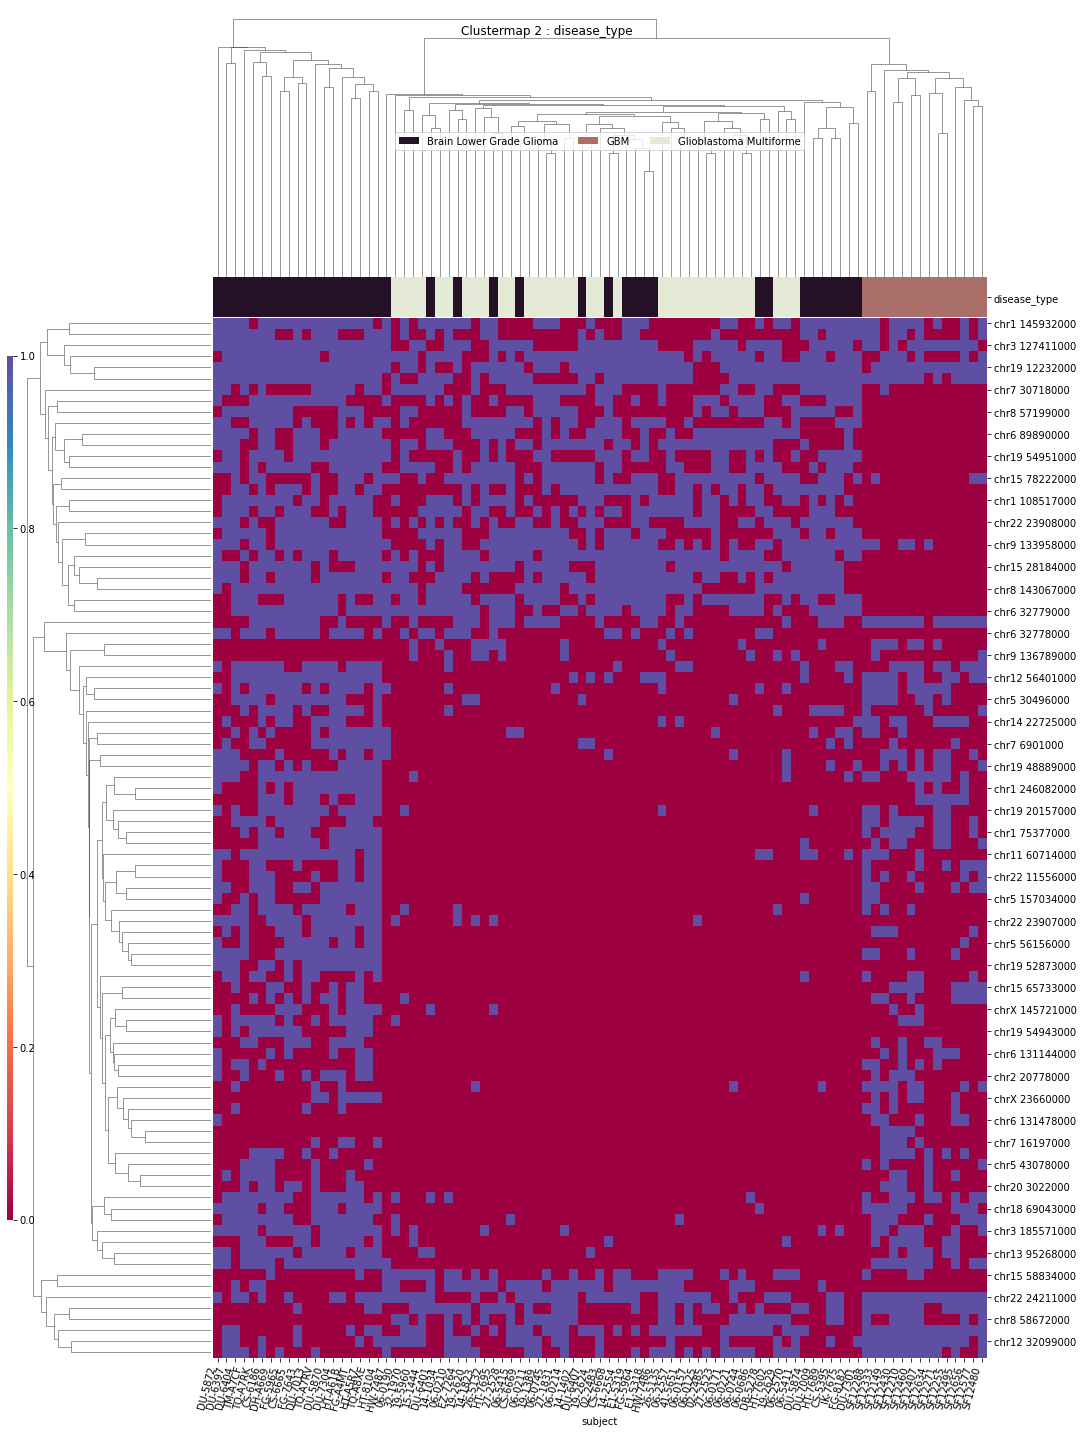

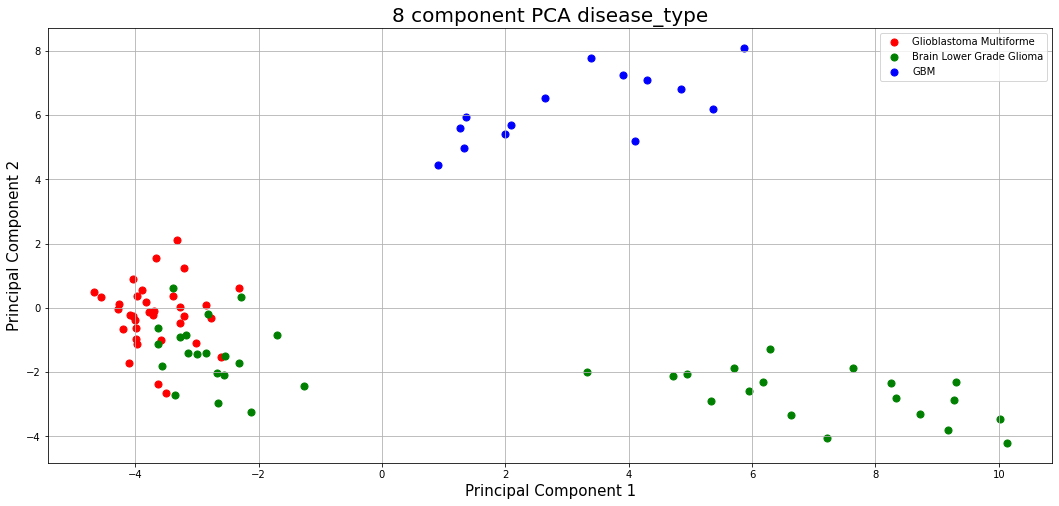

In [150]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [151]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:04:54'

---

In [152]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [153]:
pd.set_option('display.max_columns', default_max_columns)

In [154]:
pd.set_option('display.max_rows',default_max_rows)

In [155]:
pd.set_option('display.precision', default_precision)